# Correlation between CREs and RNA expression

## loading functions and importing packages

In [3]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import sklearn.manifold as sklm
import os
from sklearn.decomposition import PCA
import scanpy as sc
import functions
importlib.reload(functions)
functions.set_user('Kaja')

In [4]:
data = functions.call_data_clean()
ATAC = data['ATAC_seq']
RNA = data['RNA_seq']
QC = data['QC_metrics']
ATAC_scores = data['norm_scores']
exons = data['exons']
ATACtest = data['test1']
ATAC_dis = pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\ATAC_dis_annotated.csv", header=0, index_col=0)

## thoughts about task

Can one use correlation analysis and distance information to associate ATAC-seq regions with gene expression?

    a check
    Where are associated CREs located with respect to the TSS?
    -> scatter correlation gegen abstand zu tss
    X-Achse: Abstand zur TSS (z.B. in bp, Vorzeichen ggf. beachten)

Y-Achse: Korrelationskoeffizient (Pearson r)

schon gemacht, hat aber problem?
problem behoben

So kannst du sehen, ob CREs nahe an der TSS eine höhere Korrelation haben.

    b check
    Where are the most associated CREs located?
    -> höchst korreliertes gegen distance to tss
    Nimm pro Gen oder Peak den mit der höchsten |r| und plotte dessen Abstand zur TSS.

Evtl. Histogramm oder Densityplot (statt Scatter), um Häufungen zu sehen.

ähnlich zu dem davor, anpassen an nur höchst korreliertes gen

habe gemacht

    c kind of ähnlich
    How many CREs are associated with genes?
    -> anzahl wie viele peaks correlieren mit gene expression
Definiere ein Signifikanzkriterium, z. B. |r| > 0.3 und p < 0.05.

Dann zähle: df_corr_filtered['Peak'].nunique()

habe wie viele cres pro gen

    d check?
    Is every promoter associated with a gene?
    -> korrelieren manche peaks nicht mit den genen die in der nähe sind, bzw. korrelieren alle promoter mit ihrem closest gene
    Du brauchst die Zuordnung Peak → nächstgelegenes Gen (TSS).

Dann prüfe: Gibt es für diesen Peak eine signifikante Korrelation mit dem nächsten Gen?

    e check?
    Are some promoters associated with other genes?
    -> korrelieren manche peaks mit anderen genen als ihrem closest gene
    Gleiche Zuordnung wie oben (Peak → nächstgelegenes Gen).

Wenn ein Peak nicht mit dem nächstgelegenen, aber mit einem anderen Gen signifikant korreliert → Antwort: Ja.

    f 
    What is the closest associated CRE to a gene?
    -> closest gene korrelieren?
    Für jedes Gen: Welcher Peak (CRE) in der Nähe hat die höchste Korrelation?

✅ Das geht gut mit einem Scatterplot:

    X = Distanz CRE–TSS

    Y = Pearson r

    Farbe = Gen-ID oder Gen-Typ (optional)
    
    g 
    Are there CREs that control several genes?
    -> korrelieren manche peaks mit mehreren genen


für wieviel ist das höchst korrelierte das neareset genen barplot

was ist mit peaks die nicht in der nähe sind? geht nciht
-> text

korrelation rna und atac
distance to Tss
je kleiner distanz desto höher korrelation?
korreliere abstand mit expression und rna mit peaks
größe der rna atac korrelaiton gegen distance
haben alle promotoren einen hohen korrelationswert bei atac Rna
je näher dran desto stärker wirkt der promotor?
korrelieren manche promotoren mit mehreren genen, auch die nicht in der nähe liegen
filtern nach großer korrelation und großer abstand
welche werte woher und welches format

In [ ]:
dataframe genes gegen zellen, lücken auffüllen mit 0, fill na mit 0 
für jeden zelltyp nur paar gene die korrelieren
schleife über zelltypen

alle gene

alle peaks die in der nähe eines gens sind mit den genexpressions -> vektor mit concatenate, automatisch sortiert

 bei laila schon gemacht?

## understanding the data sets

In [20]:
# print(ATAC_dis.columns)
# print(ATAC_dis.index)
print(ATAC_dis['distance_to_TSS'])

ImmGenATAC1219.peakID
ImmGenATAC1219.peak_1        -650712.0
ImmGenATAC1219.peak_2        -584272.0
ImmGenATAC1219.peak_3        -551389.0
ImmGenATAC1219.peak_4        -550013.0
ImmGenATAC1219.peak_5        -298711.0
                                ...   
ImmGenATAC1219.peak_512591    -26956.0
ImmGenATAC1219.peak_512592    -26500.0
ImmGenATAC1219.peak_512593    -26231.0
ImmGenATAC1219.peak_512594    -25782.0
ImmGenATAC1219.peak_512595    -10421.0
Name: distance_to_TSS, Length: 512590, dtype: float64


In [21]:
#print(ATAC_dis.head())
#print(ATAC_dis['region_type'])
print(ATAC['genes.within.100Kb'])

ImmGenATAC1219.peakID
ImmGenATAC1219.peak_1           NaN
ImmGenATAC1219.peak_2           NaN
ImmGenATAC1219.peak_3           NaN
ImmGenATAC1219.peak_4           NaN
ImmGenATAC1219.peak_5           NaN
                              ...  
ImmGenATAC1219.peak_512591    Erdr1
ImmGenATAC1219.peak_512592    Erdr1
ImmGenATAC1219.peak_512593    Erdr1
ImmGenATAC1219.peak_512594    Erdr1
ImmGenATAC1219.peak_512595    Erdr1
Name: genes.within.100Kb, Length: 512590, dtype: object


In [ ]:
print(exons.head())

## i need?

In [5]:
ATAC_100kb = ATAC_dis[ATAC_dis['genes.within.100Kb'].notna()]
ATAC_T = data['ATAC_seq_T']
ATAC_top = data['top2500std']

In [6]:
rna_df=RNA.copy()
promoters=ATAC_dis[ATAC_dis['region_type']=='Promoter']
#print(promoters)
print(promoters.index)

Index(['ImmGenATAC1219.peak_21', 'ImmGenATAC1219.peak_22',
       'ImmGenATAC1219.peak_85', 'ImmGenATAC1219.peak_86',
       'ImmGenATAC1219.peak_140', 'ImmGenATAC1219.peak_141',
       'ImmGenATAC1219.peak_145', 'ImmGenATAC1219.peak_146',
       'ImmGenATAC1219.peak_157', 'ImmGenATAC1219.peak_158',
       ...
       'ImmGenATAC1219.peak_512468', 'ImmGenATAC1219.peak_512478',
       'ImmGenATAC1219.peak_512500', 'ImmGenATAC1219.peak_512501',
       'ImmGenATAC1219.peak_512506', 'ImmGenATAC1219.peak_512507',
       'ImmGenATAC1219.peak_512508', 'ImmGenATAC1219.peak_512522',
       'ImmGenATAC1219.peak_512523', 'ImmGenATAC1219.peak_512533'],
      dtype='object', name='ImmGenATAC1219.peakID', length=28047)


In [19]:
rna_df=rna_df.T
print(rna_df.index)
print(rna_df.head())

Index(['0610007P14Rik', '0610009B22Rik', '0610009O20Rik', '0610010F05Rik',
       '0610010K14Rik', '0610012G03Rik', '0610030E20Rik', '0610037L13Rik',
       '1110004E09Rik', '1110004F10Rik',
       ...
       'Zswim4', 'Zswim8', 'Zufsp', 'Zw10', 'Zwint', 'Zyg11b', 'Zyx', 'Zzef1',
       'Zzz3', 'l7Rn6'],
      dtype='object', length=6451)
               LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  \
0610007P14Rik      7.693863      7.948982       7.595628      7.681578   
0610009B22Rik      6.308741      6.318986       6.126080      6.274600   
0610009O20Rik      7.406382      7.312212       7.294084      7.548910   
0610010F05Rik      6.265552      7.436093       6.908770      7.455771   
0610010K14Rik      7.234254      7.663815       7.285670      7.338289   

               proB.CLP.BM  proB.FrA.BM  proB.FrBC.BM  B.FrE.BM    B1b.PC  \
0610007P14Rik     7.575609     7.722433      7.501594  7.116890  7.133776   
0610009B22Rik     6.742621     6.294673      6.112973  5.863

In [26]:
#print(promoters['genes.within.100Kb'])
#print(promoters.head())
promoters=promoters.T
print(promoters.index)
print(promoters.head(10))


Index(['ImmGenATAC1219.peak_21', 'ImmGenATAC1219.peak_22',
       'ImmGenATAC1219.peak_85', 'ImmGenATAC1219.peak_86',
       'ImmGenATAC1219.peak_140', 'ImmGenATAC1219.peak_141',
       'ImmGenATAC1219.peak_145', 'ImmGenATAC1219.peak_146',
       'ImmGenATAC1219.peak_157', 'ImmGenATAC1219.peak_158',
       ...
       'ImmGenATAC1219.peak_512468', 'ImmGenATAC1219.peak_512478',
       'ImmGenATAC1219.peak_512500', 'ImmGenATAC1219.peak_512501',
       'ImmGenATAC1219.peak_512506', 'ImmGenATAC1219.peak_512507',
       'ImmGenATAC1219.peak_512508', 'ImmGenATAC1219.peak_512522',
       'ImmGenATAC1219.peak_512523', 'ImmGenATAC1219.peak_512533'],
      dtype='object', name='ImmGenATAC1219.peakID', length=28047)
                        chrom   Summit mm10.60way.phastCons_scores  \
ImmGenATAC1219.peakID                                                
ImmGenATAC1219.peak_21   chr1  3671437                        0.72   
ImmGenATAC1219.peak_22   chr1  3671783                        0.91   
ImmGen

# guck dir das an!!! ist das ein problem weil ja dann natürlich nur ein cre pro gen ist. 

In [27]:
rows = []

for idx, row in promoters.iterrows():
    gene_list = str(row['genes.within.100Kb']).split(',')  # aufteilen
    for gene in gene_list:
        gene = gene.strip()
        new_row = row.copy()
        new_row['gene'] = gene
        rows.append(new_row)

promoters_genes_df = pd.DataFrame(rows)
promoters_genes_df = promoters_genes_df.drop(columns=['genes.within.100Kb'])  # alte Spalte raus


In [29]:
promoters_genes_df=promoters_genes_df

In [28]:
promoters_genes_df=promoters_genes_df.copy()

In [29]:
# Zelltypen als Index setzen (wie bei rna_df)
print(promoters_genes_df['gene'])
promoters_genes_df = promoters_genes_df.set_index('gene')
promoters_genes_df.head()


ImmGenATAC1219.peak_21         Xkr4
ImmGenATAC1219.peak_22         Xkr4
ImmGenATAC1219.peak_85          Rp1
ImmGenATAC1219.peak_85        Sox17
ImmGenATAC1219.peak_86          Rp1
                              ...  
ImmGenATAC1219.peak_512522    Ddx3y
ImmGenATAC1219.peak_512523      Uty
ImmGenATAC1219.peak_512523    Ddx3y
ImmGenATAC1219.peak_512533      Uty
ImmGenATAC1219.peak_512533    Ddx3y
Name: gene, Length: 149458, dtype: object


,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,...,var,sd,variability,min,max,range,skewness,region_type,TSS_bin,gene_context
gene,,,,,,,,,,,,,,,,,,,,,
Xkr4,chr1,3671437,0.72,2.02,1.0,Xkr4,0.271312,1.482083,1.442282,1.748886,...,0.301824,0.549385,0.647858,0.068793,3.228378,3.159585,1.050744,Promoter,0-300,genic
Xkr4,chr1,3671783,0.91,9.67,1.0,NaN,2.180315,0.847423,0.525201,1.175393,...,0.381503,0.617660,0.709743,0.068634,4.592076,4.523442,2.625407,Promoter,0-300,downstream
Rp1,chr1,4497061,0.09,3.88,1.0,NaN,1.680462,1.735359,2.310912,1.175393,...,0.423036,0.650412,0.407268,0.314882,3.190593,2.875711,0.440147,Promoter,0-300,genic
Sox17,chr1,4497061,0.09,3.88,1.0,NaN,1.680462,1.735359,2.310912,1.175393,...,0.423036,0.650412,0.407268,0.314882,3.190593,2.875711,0.440147,Promoter,0-300,genic
Rp1,chr1,4497535,0.25,6.35,1.0,NaN,0.271312,1.735359,0.928022,0.824349,...,0.322921,0.568261,0.547874,0.082892,3.986299,3.903407,1.657317,Promoter,0-300,downstream


## brauche

In [30]:
promoters_genes_df=promoters_genes_df.drop(['chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS'], axis=1)

In [31]:
print(promoters_genes_df.head())

       LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  proB.CLP.BM  \
gene                                                                          
Xkr4       0.271312      1.482083       1.442282      1.748886     1.461194   
Xkr4       2.180315      0.847423       0.525201      1.175393     1.360805   
Rp1        1.680462      1.735359       2.310912      1.175393     2.176748   
Sox17      1.680462      1.735359       2.310912      1.175393     2.176748   
Rp1        0.271312      1.735359       0.928022      0.824349     1.276300   

       proB.FrA.BM  proB.FrBC.BM  preB.FrD.BM  B.FrE.BM    B1b.PC  ...  \
gene                                                               ...   
Xkr4      1.136483      0.485032     0.311767  0.733220  0.096719  ...   
Xkr4      1.161835      1.034058     0.311767  0.720389  0.677425  ...   
Rp1       0.919550      1.087972     1.471074  1.314173  1.558968  ...   
Sox17     0.919550      1.087972     1.471074  1.314173  1.558968  ...   
Rp

In [32]:
print(rna_df.head)

<bound method NDFrame.head of                LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  \
0610007P14Rik      7.693863      7.948982       7.595628      7.681578   
0610009B22Rik      6.308741      6.318986       6.126080      6.274600   
0610009O20Rik      7.406382      7.312212       7.294084      7.548910   
0610010F05Rik      6.265552      7.436093       6.908770      7.455771   
0610010K14Rik      7.234254      7.663815       7.285670      7.338289   
...                     ...           ...            ...           ...   
Zyg11b             7.068884      7.234769       7.434340      7.433421   
Zyx               10.074516      9.967413      10.494566     10.473537   
Zzef1              7.520544      7.295411       7.433883      6.920986   
Zzz3               8.088805      8.438751       8.233536      8.224480   
l7Rn6              6.676449      7.195291       6.823470      7.143841   

               proB.CLP.BM  proB.FrA.BM  proB.FrBC.BM  B.FrE.BM    B1b.PC  \
0610

In [33]:
gemeinsame_Gene = list((promoters_genes_df.index).intersection(rna_df.index))

print(f"Anzahl gemeinsamer Gene: {len(gemeinsame_Gene)}")
print("Gemeinsame Gene (Beispiel):", list(gemeinsame_Gene)[:10])

gemeinsame_zelltypen = list((promoters_genes_df.columns).intersection(rna_df.columns))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

Anzahl gemeinsamer Gene: 6431
Gemeinsame Gene (Beispiel): ['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', 'Pcmtd1', 'Rrs1', 'Vcpip1', 'Sgk3', 'Cops5']
Anzahl gemeinsamer Zelltypen: 85
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp']


In [34]:
promoters_genes=promoters_genes_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]
rna_df=rna_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]

print(promoters_genes.shape)
print(rna_df.shape)

#r, p_value=pearsonr(promoters_genes, rna_df)

(53038, 85)
(6431, 85)


In [ ]:
print(promoters_genes.head())
#print(rna_df.head())

## tss distance

In [43]:
from scipy.spatial import cKDTree
import numpy as np

# Berechne TSS je nach Strang
exons['TSS'] = np.where(exons['Strand'] == '+',
                        exons['Transcription Start'],
                        exons['Transcription End'])

distance_list = []
gene_list = []

for chrom in ATAC['chrom'].unique():
    # Peaks auf diesem Chromosom
    peaks_chr = ATAC[ATAC['chrom'] == chrom]
    peaks_pos = peaks_chr['Summit'].values

    # TSS-Koordinaten und Gen-Infos auf diesem Chromosom
    exons_chr = exons[exons['Chromosom'] == chrom]
    tss_pos = exons_chr['TSS'].values
    gene_names = exons_chr['Genname'].values
    strand_chr = exons_chr['Strand'].values

    if len(tss_pos) > 0:
        # KDTree aufbauen
        tree = cKDTree(tss_pos.reshape(-1, 1))
        dist, idx = tree.query(peaks_pos.reshape(-1, 1), k=1)

        nearest_tss = tss_pos[idx]
        strand_for_peaks = strand_chr[idx]  # passender Strang

        # Strand-spezifische Distanz berechnen
        signed_dist = np.where(strand_for_peaks == '+',
                               peaks_pos - nearest_tss,
                               nearest_tss - peaks_pos)

        distance_list.extend(signed_dist)
        gene_list.extend(gene_names[idx])
    else:
        distance_list.extend([np.nan] * len(peaks_pos))
        gene_list.extend([np.nan] * len(peaks_pos))


from scipy.spatial import cKDTree
import numpy as np

# Berechne TSS je nach Strang
exons['TSS'] = np.where(exons['Strand'] == '+',
                        exons['Transcription Start'],
                        exons['Transcription End'])

distance_list = []
gene_list = []

for chrom in ATAC['chrom'].unique():
    # Peaks auf diesem Chromosom
    peaks_chr = ATAC[ATAC['chrom'] == chrom]
    peaks_pos = peaks_chr['Summit'].values

    # TSS-Koordinaten und Gen-Infos auf diesem Chromosom
    exons_chr = exons[exons['Chromosom'] == chrom]
    tss_pos = exons_chr['TSS'].values
    gene_names = exons_chr['Genname'].values
    strand_chr = exons_chr['Strand'].values

    if len(tss_pos) > 0:
        # KDTree aufbauen
        tree = cKDTree(tss_pos.reshape(-1, 1))
        dist, idx = tree.query(peaks_pos.reshape(-1, 1), k=1)

        nearest_tss = tss_pos[idx]
        strand_for_peaks = strand_chr[idx]  # passender Strang

        # Strand-spezifische Distanz berechnen
        signed_dist = np.where(strand_for_peaks == '+',
                               peaks_pos - nearest_tss,
                               nearest_tss - peaks_pos)

        distance_list.extend(signed_dist)
        gene_list.extend(gene_names[idx])
    else:
        distance_list.extend([np.nan] * len(peaks_pos))
        gene_list.extend([np.nan] * len(peaks_pos))

from scipy.spatial import cKDTree
import numpy as np

# Berechne TSS je nach Strang
exons['TSS'] = np.where(exons['Strand'] == '+',
                        exons['Transcription Start'],
                        exons['Transcription End'])

distance_list = []
gene_list = []

for chrom in ATAC['chrom'].unique():
    # Peaks auf diesem Chromosom
    peaks_chr = ATAC[ATAC['chrom'] == chrom]
    peaks_pos = peaks_chr['Summit'].values

    # TSS-Koordinaten und Gen-Infos auf diesem Chromosom
    exons_chr = exons[exons['Chromosom'] == chrom]
    tss_pos = exons_chr['TSS'].values
    gene_names = exons_chr['Genname'].values
    strand_chr = exons_chr['Strand'].values

    if len(tss_pos) > 0:
        # KDTree aufbauen
        tree = cKDTree(tss_pos.reshape(-1, 1))
        dist, idx = tree.query(peaks_pos.reshape(-1, 1), k=1)

        nearest_tss = tss_pos[idx]
        strand_for_peaks = strand_chr[idx]  # passender Strang

        # Strand-spezifische Distanz berechnen
        signed_dist = np.where(strand_for_peaks == '+',
                               peaks_pos - nearest_tss,
                               nearest_tss - peaks_pos)

        distance_list.extend(signed_dist)
        gene_list.extend(gene_names[idx])
    else:
        distance_list.extend([np.nan] * len(peaks_pos))
        gene_list.extend([np.nan] * len(peaks_pos))

from scipy.spatial import cKDTree
import numpy as np

# Berechne TSS je nach Strang
exons['TSS'] = np.where(exons['Strand'] == '+',
                        exons['Transcription Start'],
                        exons['Transcription End'])

distance_list = []
gene_list = []

for chrom in ATAC['chrom'].unique():
    # Peaks auf diesem Chromosom
    peaks_chr = ATAC[ATAC['chrom'] == chrom]
    peaks_pos = peaks_chr['Summit'].values

    # TSS-Koordinaten und Gen-Infos auf diesem Chromosom
    exons_chr = exons[exons['Chromosom'] == chrom]
    tss_pos = exons_chr['TSS'].values
    gene_names = exons_chr['Genname'].values
    strand_chr = exons_chr['Strand'].values

    if len(tss_pos) > 0:
        # KDTree aufbauen
        tree = cKDTree(tss_pos.reshape(-1, 1))
        dist, idx = tree.query(peaks_pos.reshape(-1, 1), k=1)

        nearest_tss = tss_pos[idx]
        strand_for_peaks = strand_chr[idx]  # passender Strang

        # Strand-spezifische Distanz berechnen
        signed_dist = np.where(strand_for_peaks == '+',
                               peaks_pos - nearest_tss,
                               nearest_tss - peaks_pos)

        distance_list.extend(signed_dist)
        gene_list.extend(gene_names[idx])
    else:
        distance_list.extend([np.nan] * len(peaks_pos))
        gene_list.extend([np.nan] * len(peaks_pos))



In [44]:
ATAC_dis = ATAC.copy()
ATAC_dis['nearest_gene'] = gene_list
ATAC_dis['distance_to_TSS'] = distance_list
# ATAC_dis['mean'] = ATAC_scores.mean(axis=1, numeric_only=True)
# ATAC_dis['median'] = ATAC_scores.median(axis=1, numeric_only=True)
# ATAC_dis['var'] = ATAC_scores.var(axis=1, numeric_only=True)
# ATAC_dis['sd'] = ATAC_scores.std(axis=1, numeric_only=True)
# ATAC_dis['variability'] = ATAC_dis['sd'] / (ATAC_dis['mean'] + 1e-6)
# ATAC_dis['min'] = ATAC_scores.min(axis=1)
# ATAC_dis['max'] = ATAC_scores.max(axis=1)
# ATAC_dis['range'] = ATAC_dis['max'] - ATAC_dis['min']
# ATAC_dis['skewness'] = ATAC_scores.apply(scipy.stats.skew, axis=1)
ATAC_dis['region_type'] = np.where(ATAC_dis['distance_to_TSS'].abs() < 300, 'Promoter', 'Enhancer')
# ATAC_dis['TSS_bin'] = pd.cut(ATAC_dis['distance_to_TSS'].abs(), bins=bins, labels=labels, include_lowest=True)
# ATAC_dis['gene_context'] = ATAC_dis.apply(lambda row: assign_peak_location(row, exons), axis=1)

In [45]:
print(ATAC_dis['distance_to_TSS'].min())
print(ATAC_dis['distance_to_TSS'].max())

-1932147.0
2012626.0


In [98]:
# ATAC_100kb = ATAC_dis[ATAC_dis['genes.within.100Kb'].notna()]
# ATAC_T = data['ATAC_seq_T']
ATAC_top = data['top2500std']

In [64]:
print(ATAC_dis['distance_to_TSS'].min())
print(ATAC_dis['distance_to_TSS'].max())

-1932147.0
2012626.0


## funktionierende correlation

In [35]:
def correlate_promoter_atac_rna(ATAC_dis, RNA, ATAC_scores):
    # Nur gemeinsame Cell-Typ-Namen verwenden!
    gemeinsame_celltypen = [col for col in ATAC_scores.columns if col in RNA.columns]
    print(f"Gemeinsame Celltypen ({len(gemeinsame_celltypen)}):", gemeinsame_celltypen)
    
    promoter_peaks = ATAC_dis[ATAC_dis['distance_to_TSS'] <= 600000].copy() # dieser wert <= ist schwellwert ab wann keine werte mehr berücksichtigt werden, bei lailas graph war er so eingestellt, das fast alle positiven rausgefiltert werden
    #promoter_peaks = ATAC_dis[ATAC_dis['distance_to_TSS']].copy()
    promoter_peaks['main_gene'] = promoter_peaks['nearest_gene']
    results = []
    for idx, row in promoter_peaks.iterrows():
        gene = row['main_gene']
        if gene in RNA.index:
            atac_vec = row[gemeinsame_celltypen].values.astype(float)
            rna_vec = RNA.loc[gene, gemeinsame_celltypen].values.astype(float)
            if not (np.isnan(atac_vec).any() or np.isnan(rna_vec).any()):
                r, p = scipy.stats.pearsonr(atac_vec, rna_vec)
                results.append({'peak_id': idx, 'gene': gene, 'r': r, 'p': p, 'distance_to_TSS': row['distance_to_TSS'], 'region_type': row['region_type']})
    print(f"Anzahl berechnete Korrelationen: {len(results)}")
    return pd.DataFrame(results)
cor_df = correlate_promoter_atac_rna(ATAC_dis[ATAC_dis.index.isin(ATAC_top)], RNA, ATAC_scores)


Gemeinsame Celltypen (85): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI

In [48]:
print(cor_df['region_type'])

0      Enhancer
1      Enhancer
2      Enhancer
3      Enhancer
4      Enhancer
         ...   
612    Enhancer
613    Enhancer
614    Enhancer
615    Enhancer
616    Enhancer
Name: region_type, Length: 617, dtype: object


In [36]:
def correlate_promoter_atac_rna(ATAC_dis, RNA, ATAC_scores):
    # Nur gemeinsame Cell-Typ-Namen verwenden!
    gemeinsame_celltypen = [col for col in ATAC_scores.columns if col in RNA.columns]
    print(f"Gemeinsame Celltypen ({len(gemeinsame_celltypen)}):", gemeinsame_celltypen)
    
    promoter_peaks = ATAC_dis[ATAC_dis['distance_to_TSS'] <= 600000].copy() # dieser wert <= ist schwellwert ab wann keine werte mehr berücksichtigt werden, bei lailas graph war er so eingestellt, das fast alle positiven rausgefiltert werden
    #promoter_peaks = ATAC_dis[ATAC_dis['distance_to_TSS']].copy()
    promoter_peaks['main_gene'] = promoter_peaks['nearest_gene']
    results = []
    for idx, row in promoter_peaks.iterrows():
        gene = row['main_gene']
        if gene in RNA.index:
            atac_vec = row[gemeinsame_celltypen].values.astype(float)
            rna_vec = RNA.loc[gene, gemeinsame_celltypen].values.astype(float)
            if not (np.isnan(atac_vec).any() or np.isnan(rna_vec).any()):
                r, p = scipy.stats.pearsonr(atac_vec, rna_vec)
                results.append({'peak_id': idx, 'gene': gene, 'r': r, 'p': p, 'distance_to_TSS': row['distance_to_TSS'], 'region_type': row['region_type']})
    print(f"Anzahl berechnete Korrelationen: {len(results)}")
    return pd.DataFrame(results)

cor_df = correlate_promoter_atac_rna(ATAC_dis[ATAC_dis.index.isin(ATAC_top)], RNA, ATAC_scores)

# #Index mit höchster |r| pro Gen finden
# idx_max_corr = cor_df.groupby("gene")["r"].apply(lambda x: x.abs().idxmax())

# # Entsprechende Zeilen extrahieren
# most_associated_cre = cor_df.loc[idx_max_corr].reset_index(drop=True)

Gemeinsame Celltypen (85): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI

In [37]:
cor_df = correlate_promoter_atac_rna(ATAC_dis[ATAC_dis.index.isin(ATAC_top)], RNA, ATAC_scores)
#cor_df = correlate_promoter_atac_rna(ATAC_dis, RNA, ATAC_scores)

Gemeinsame Celltypen (85): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI

In [ ]:
# #Index mit höchster |r| pro Gen finden
# idx_max_corr = cor_df.groupby("gene")["r"].apply(lambda x: x.abs().idxmax())

# # Entsprechende Zeilen extrahieren
# most_associated_cre = cor_df.loc[idx_max_corr].reset_index(drop=True)

## okaye plots

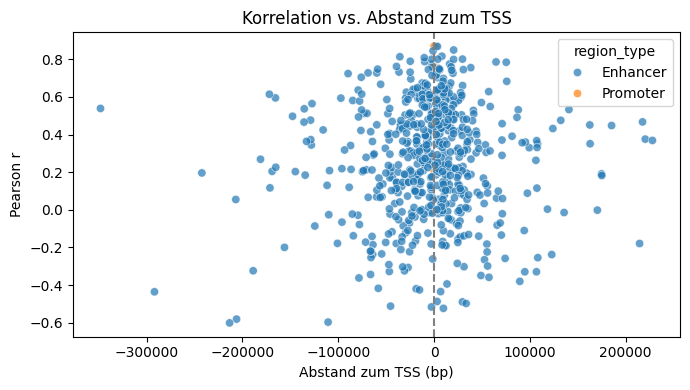

In [38]:
#a

plt.figure(figsize=(7,4))
sns.scatterplot(data=cor_df, x='distance_to_TSS', y='r', hue= 'region_type', alpha=0.7)
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Abstand zum TSS (bp)')
plt.ylabel('Pearson r')
plt.title('Korrelation vs. Abstand zum TSS')
plt.tight_layout()
plt.show()

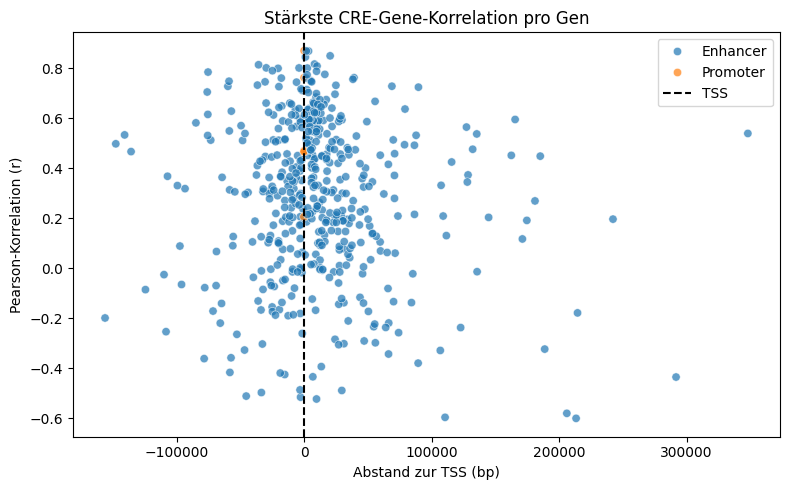

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# b

plt.figure(figsize=(8, 5))
sns.scatterplot(data=most_associated_cre,
                x="distance_to_TSS",
                y="r",
                hue="region_type",  # optional: nach Regionstyp einfärben, falls vorhanden
                alpha=0.7)

plt.axvline(0, color="black", linestyle="--", label="TSS")
plt.xlabel("Abstand zur TSS (bp)")
plt.ylabel("Pearson-Korrelation (r)")
plt.title("Stärkste CRE-Gene-Korrelation pro Gen")
plt.legend()
plt.tight_layout()
plt.show()

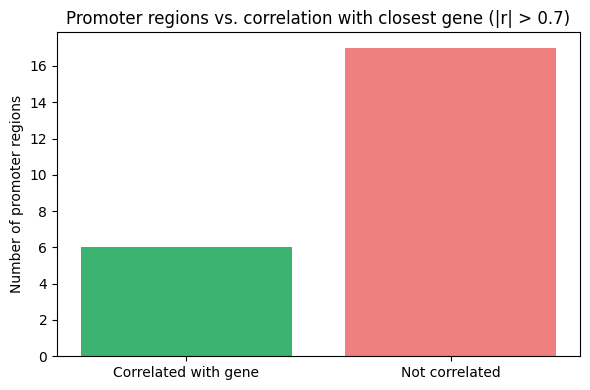

In [ ]:
#c, d

import matplotlib.pyplot as plt

# Thresholds
r_threshold = 0.7  # correlation strength
dist_threshold = 2000  # promoter region definition in bp

# Filter for promoter regions
promoter_df = cor_df[cor_df['distance_to_TSS'].abs() <= dist_threshold]

# Count correlations
n_total = promoter_df.shape[0]
n_correlated = promoter_df[promoter_df['r'].abs() > r_threshold].shape[0]
n_not_correlated = n_total - n_correlated

# Bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Correlated with gene', 'Not correlated'], 
        [n_correlated, n_not_correlated],
        color=['mediumseagreen', 'lightcoral'])
plt.ylabel('Number of promoter regions')
plt.title(f'Promoter regions vs. correlation with closest gene (|r| > {r_threshold})')
plt.tight_layout()

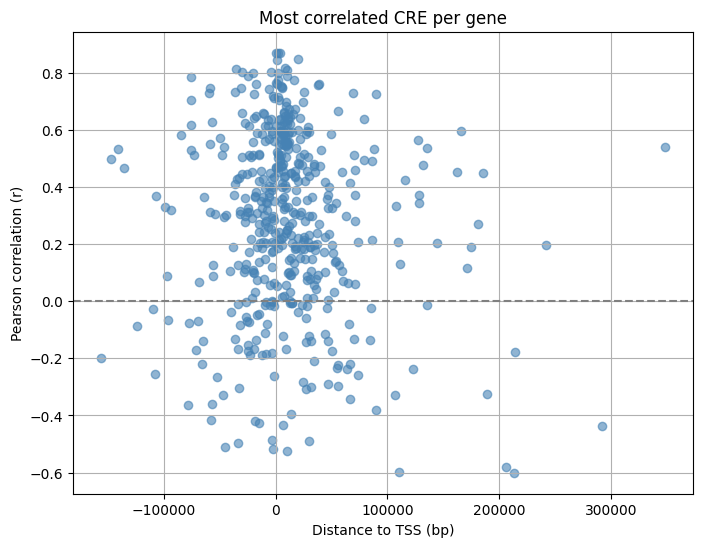

In [58]:
# f

import matplotlib.pyplot as plt

# Für jedes Gen den Peak mit der höchsten |r|-Korrelation
closest_peaks = cor_df.loc[cor_df.groupby('gene')['r'].apply(lambda x: x.abs().idxmax())]

# Plot: r vs distance_to_TSS
plt.figure(figsize=(8,6))
sc = plt.scatter(closest_peaks['distance_to_TSS'], closest_peaks['r'], c='steelblue', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Pearson correlation (r)')
plt.title('Most correlated CRE per gene')
plt.grid(True)
plt.show()

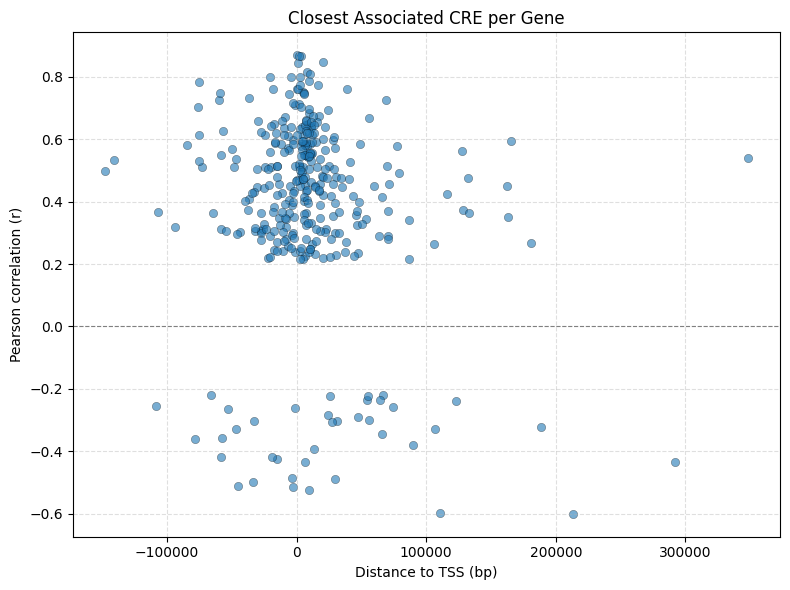

In [ ]:
import matplotlib.pyplot as plt

#f

# Nur signifikante Korrelationen (optionaler Filter)
signifikant = cor_df[cor_df['p'] < 0.05].copy()

# Für jedes Gen: den Peak mit dem kleinsten Abstand zur TSS (absolut)
idx_min_dist = signifikant.groupby('gene')['distance_to_TSS'].apply(lambda x: x.abs().idxmin())
closest_cres = signifikant.loc[idx_min_dist]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(closest_cres['distance_to_TSS'], closest_cres['r'], alpha=0.6, edgecolor='k', linewidth=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Pearson correlation (r)')
plt.title('Closest Associated CRE per Gene')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

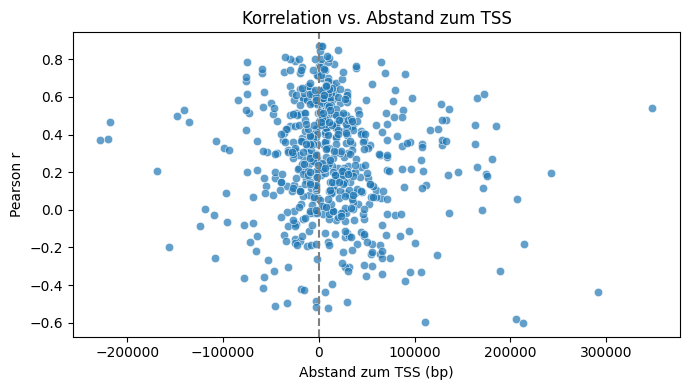

In [56]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=cor_df, x='distance_to_TSS', y='r', alpha=0.7)
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Abstand zum TSS (bp)')
plt.ylabel('Pearson r')
plt.title('Korrelation vs. Abstand zum TSS')
plt.tight_layout()
plt.show()

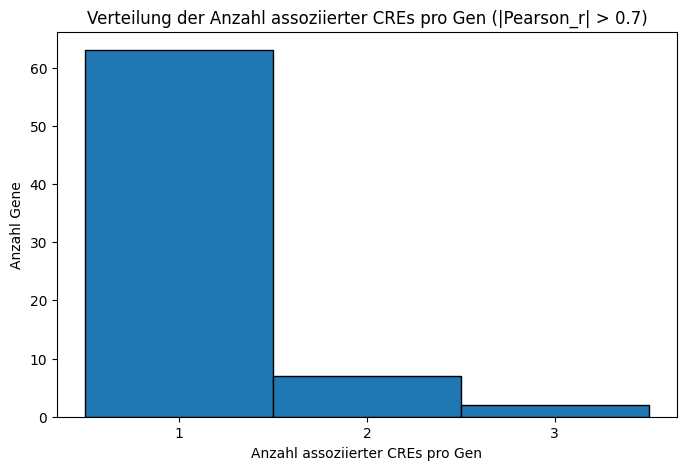

In [54]:
import matplotlib.pyplot as plt

# Schwellenwert für assoziierte CREs (kannst du anpassen)
threshold = 0.7

# Filter: nur CREs mit absoluter Korrelation größer als threshold
assoziierte_cres = ergebnis[ergebnis['Pearson_r'].abs() > threshold]

# Anzahl assoziierter CREs pro Gen zählen
anzahl_cres_pro_gen = assoziierte_cres.groupby('Gen').size()

# Histogramm plotten
plt.figure(figsize=(8,5))
plt.hist(anzahl_cres_pro_gen, bins=range(1, anzahl_cres_pro_gen.max()+2), edgecolor='black', align='left')
plt.xlabel('Anzahl assoziierter CREs pro Gen')
plt.ylabel('Anzahl Gene')
plt.title(f'Verteilung der Anzahl assoziierter CREs pro Gen (|Pearson_r| > {threshold})')
plt.xticks(range(1, anzahl_cres_pro_gen.max()+1))
plt.show()

## plot nicht beste wahl?

In [ ]:
#g

# Schwelle für signifikante Korrelation
threshold = 0.7

# Nur Peaks mit starker Korrelation
assoziierte = cor_df[cor_df['r'].abs() > threshold]

# Zählen: wie viele Gene pro Peak?
gene_counts_per_peak = assoziierte.groupby('peak_id')['gene'].nunique()

# Plot: Histogramm
plt.figure(figsize=(8,6))
plt.hist(gene_counts_per_peak, bins=range(1, gene_counts_per_peak.max()+2), edgecolor='black', align='left')
plt.xlabel('Number of associated genes per CRE')
plt.ylabel('Number of CREs')
plt.title(f'Distribution of associated genes per CRE (|r| > {threshold})')
plt.xticks(range(1, gene_counts_per_peak.max()+1))
plt.grid(True)
plt.show()

In [ ]:
# e
 
# Hole für jeden Peak das nächstgelegene Gen
nearest_genes = ATAC_dis.loc[cor_df['peak_id'], 'nearest_gene']

# Vergleiche mit dem tatsächlich korrelierten Gen
correlated_genes = cor_df.set_index('peak_id')['gene']

# Boolean Series: stimmt das nächstgelegene Gen mit dem korrelierten überein?
matches = (nearest_genes == correlated_genes)

# Zählen
n_same = matches.sum()
n_different = (~matches).sum()

# Barplot
plt.figure(figsize=(6, 4))
plt.bar(['Matches nearest gene', 'Different gene'], 
        [n_same, n_different],
        color=['mediumseagreen', 'lightcoral'])
plt.ylabel('Number of promoter peaks')
plt.title('Do promoters correlate with their nearest gene?')
plt.tight_layout()
plt.show()

# weg

## plots

In [2]:
# c

# Voraussetzung: promoter_df existiert mit Filter auf distance <= 2000
# z. B. promoter_df = cor_df[cor_df['distance_to_TSS'].abs() <= dist_threshold]

plt.figure(figsize=(6, 4))
sns.histplot(promoter_df['r'].abs(), bins=30, kde=True, color='mediumseagreen')
plt.axvline(r_threshold, color='red', linestyle='--', label=f'|r| = {r_threshold}')
plt.xlabel('Absolute Pearson-Korrelation (|r|)')
plt.ylabel('Anzahl Promoter-Regionen')
plt.title('Verteilung der Korrelationen in Promoter-Regionen')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# d

# Zähle alle Promoter und wie viele davon stark korreliert sind
n_total = promoter_df.shape[0]
n_correlated = promoter_df[promoter_df['r'].abs() > r_threshold].shape[0]
n_uncorrelated = n_total - n_correlated

plt.figure(figsize=(6, 4))
plt.bar(['Assoziiert', 'Nicht assoziiert'], [n_correlated, n_uncorrelated],
        color=['mediumseagreen', 'lightcoral'])
plt.ylabel('Anzahl Promoter-Regionen')
plt.title(f'Sind alle Promoter mit einem Gen assoziiert? (|r| > {r_threshold})')
plt.tight_layout()
plt.show()

In [ ]:
# e

# Vorbereitung: nur gemeinsame Zelltypen verwenden
gemeinsame_celltypen = [col for col in ATAC_scores.columns if col in RNA.columns]

# Optional: reduzierte Zahl von Genen zur Laufzeitbeschleunigung (z. B. top expressed)
# RNA_subset = RNA.loc[RNA.index.intersection(top_genes)]  # falls du sowas hast

# Schritt 1: Für jede Peak-ID Korrelation mit allen Genen berechnen
peak_gene_results = []
for peak_id, peak_row in ATAC_dis.loc[ATAC_top].iterrows():
    atac_vec = ATAC_scores.loc[peak_id, gemeinsame_celltypen].values.astype(float)
    if np.isnan(atac_vec).any():
        continue
    for gene in RNA.index:
        rna_vec = RNA.loc[gene, gemeinsame_celltypen].values.astype(float)
        if np.isnan(rna_vec).any():
            continue
        r, p = pearsonr(atac_vec, rna_vec)
        peak_gene_results.append({
            'peak_id': peak_id,
            'gene': gene,
            'r': r,
            'p': p,
            'nearest_gene': peak_row['nearest_gene'],
            'distance_to_TSS': peak_row['distance_to_TSS']
        })

peak_gene_df = pd.DataFrame(peak_gene_results)

# Schritt 2: Prüfen, ob stärkste Korrelation ≠ nächstgelegenes Gen
max_corr_per_peak = peak_gene_df.loc[peak_gene_df.groupby('peak_id')['r'].apply(lambda x: x.abs().idxmax())]

# Anteil der Fälle, in denen das bestassoziierte Gen ≠ nearest_gene
diff_gene = max_corr_per_peak[max_corr_per_peak['gene'] != max_corr_per_peak['nearest_gene']]

print(f"Anzahl Peaks mit anderer stärkster Genassoziation: {len(diff_gene)} von {len(max_corr_per_peak)}")

# Optionaler Barplot
plt.figure(figsize=(6,4))
plt.bar(['nearest_gene', 'different_gene'], 
        [len(max_corr_per_peak)-len(diff_gene), len(diff_gene)],
        color=['skyblue', 'orange'])
plt.ylabel('Number of CREs')
plt.title('Do some CREs correlate stronger with a different gene?')
plt.tight_layout()
plt.show()

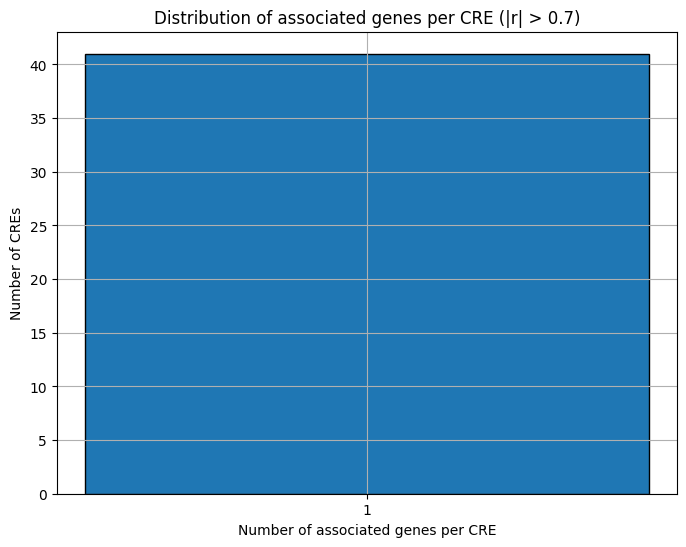

In [ ]:
#g

# Schwelle für signifikante Korrelation
threshold = 0.7

# Nur Peaks mit starker Korrelation
assoziierte = cor_df[cor_df['r'].abs() > threshold]

# Zählen: wie viele Gene pro Peak?
gene_counts_per_peak = assoziierte.groupby('peak_id')['gene'].nunique()

# Plot: Histogramm
plt.figure(figsize=(8,6))
plt.hist(gene_counts_per_peak, bins=range(1, gene_counts_per_peak.max()+2), edgecolor='black', align='left')
plt.xlabel('Number of associated genes per CRE')
plt.ylabel('Number of CREs')
plt.title(f'Distribution of associated genes per CRE (|r| > {threshold})')
plt.xticks(range(1, gene_counts_per_peak.max()+1))
plt.grid(True)
plt.show()

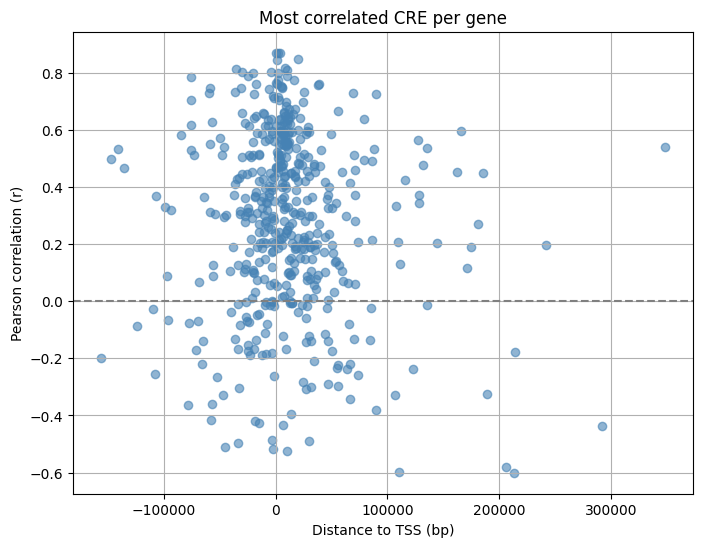

In [ ]:
# f

import matplotlib.pyplot as plt

# Für jedes Gen den Peak mit der höchsten |r|-Korrelation
closest_peaks = cor_df.loc[cor_df.groupby('gene')['r'].apply(lambda x: x.abs().idxmax())]

# Plot: r vs distance_to_TSS
plt.figure(figsize=(8,6))
sc = plt.scatter(closest_peaks['distance_to_TSS'], closest_peaks['r'], c='steelblue', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Pearson correlation (r)')
plt.title('Most correlated CRE per gene')
plt.grid(True)
plt.show()

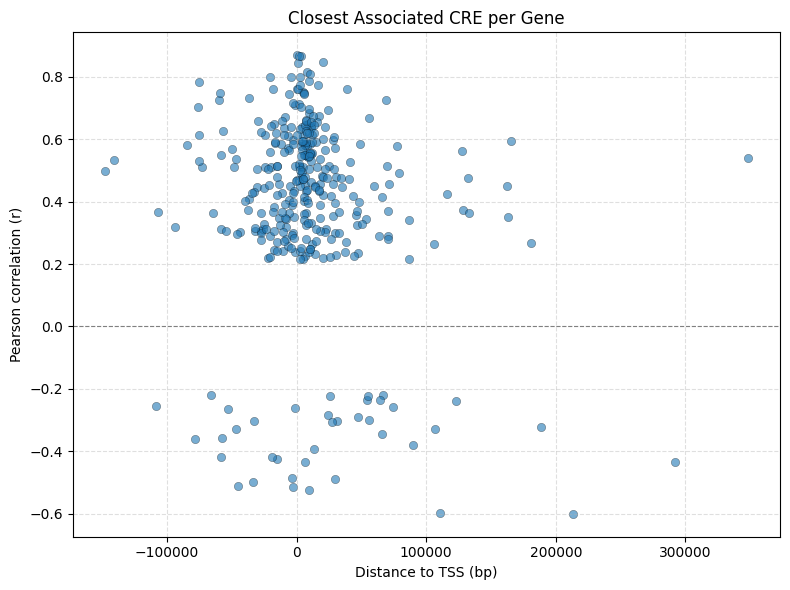

In [50]:
import matplotlib.pyplot as plt

# Nur signifikante Korrelationen (optionaler Filter)
signifikant = cor_df[cor_df['p'] < 0.05].copy()

# Für jedes Gen: den Peak mit dem kleinsten Abstand zur TSS (absolut)
idx_min_dist = signifikant.groupby('gene')['distance_to_TSS'].apply(lambda x: x.abs().idxmin())
closest_cres = signifikant.loc[idx_min_dist]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(closest_cres['distance_to_TSS'], closest_cres['r'], alpha=0.6, edgecolor='k', linewidth=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Pearson correlation (r)')
plt.title('Closest Associated CRE per Gene')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

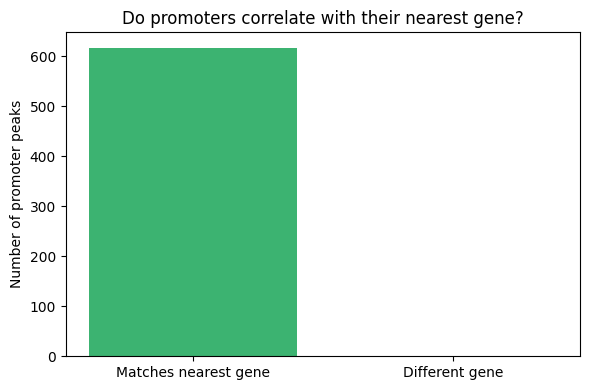

In [118]:
import matplotlib.pyplot as plt

# Hole für jeden Peak das nächstgelegene Gen
nearest_genes = ATAC_dis.loc[cor_df['peak_id'], 'nearest_gene']

# Vergleiche mit dem tatsächlich korrelierten Gen
correlated_genes = cor_df.set_index('peak_id')['gene']

# Boolean Series: stimmt das nächstgelegene Gen mit dem korrelierten überein?
matches = (nearest_genes == correlated_genes)

# Zählen
n_same = matches.sum()
n_different = (~matches).sum()

# Barplot
plt.figure(figsize=(6, 4))
plt.bar(['Matches nearest gene', 'Different gene'], 
        [n_same, n_different],
        color=['mediumseagreen', 'lightcoral'])
plt.ylabel('Number of promoter peaks')
plt.title('Do promoters correlate with their nearest gene?')
plt.tight_layout()
plt.show()

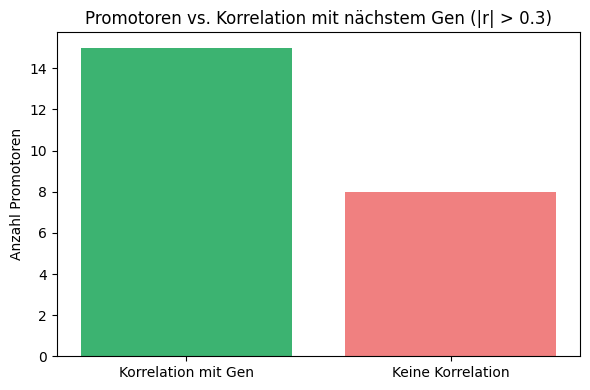

In [ ]:
"Is every promoter associated with a gene?"

import matplotlib.pyplot as plt

# Schwellenwert setzen
r_threshold = 0.3  # oder z. B. 0.5
dist_threshold = 2000  # Promoter-Grenze

# Promotoren auswählen
promoter_df = cor_df[cor_df['distance_to_TSS'].abs() <= dist_threshold]

# Zähle, wie viele signifikant korrelieren
n_total = promoter_df.shape[0]
n_korrelieren = promoter_df[promoter_df['r'].abs() > r_threshold].shape[0]
n_nicht = n_total - n_korrelieren

# Balkendiagramm
plt.figure(figsize=(6,4))
plt.bar(['Korrelation mit Gen', 'Keine Korrelation'], [n_korrelieren, n_nicht],
        color=['mediumseagreen', 'lightcoral'])
plt.ylabel('Anzahl Promotoren')
plt.title(f'Promotoren vs. Korrelation mit nächstem Gen (|r| > {r_threshold})')
plt.tight_layout()
plt.show()

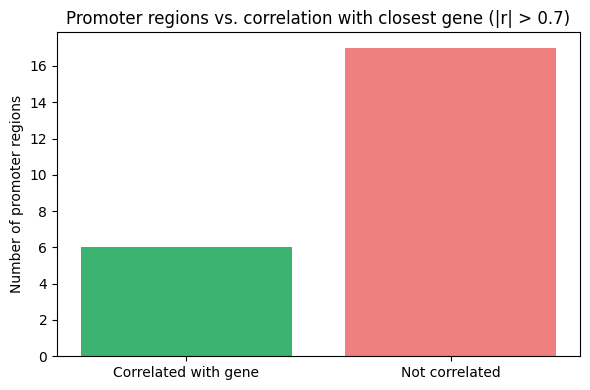

In [120]:
import matplotlib.pyplot as plt

# Thresholds
r_threshold = 0.7  # correlation strength
dist_threshold = 2000  # promoter region definition in bp

# Filter for promoter regions
promoter_df = cor_df[cor_df['distance_to_TSS'].abs() <= dist_threshold]

# Count correlations
n_total = promoter_df.shape[0]
n_correlated = promoter_df[promoter_df['r'].abs() > r_threshold].shape[0]
n_not_correlated = n_total - n_correlated

# Bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Correlated with gene', 'Not correlated'], 
        [n_correlated, n_not_correlated],
        color=['mediumseagreen', 'lightcoral'])
plt.ylabel('Number of promoter regions')
plt.title(f'Promoter regions vs. correlation with closest gene (|r| > {r_threshold})')
plt.tight_layout()

In [90]:
print(ATAC_dis['distance_to_TSS'].min())
print(ATAC_dis['distance_to_TSS'].max())

-1932147.0
2012626.0


In [91]:
print(cor_df['distance_to_TSS'].min())
print(cor_df['distance_to_TSS'].max())

-227885.0
799654.0


In [104]:
print(cor_df.columns)

Index(['peak_id', 'gene', 'r', 'p', 'distance_to_TSS', 'region_type'], dtype='object')


In [106]:
print(cor_df['region_type'])

0      Enhancer
1      Enhancer
2      Enhancer
3      Enhancer
4      Enhancer
         ...   
612    Enhancer
613    Enhancer
614    Enhancer
615    Enhancer
616    Enhancer
Name: region_type, Length: 617, dtype: object


In [69]:
print(cor_df['distance_to_TSS'].min())
print(cor_df['distance_to_TSS'].max())

-227885.0
1993.0


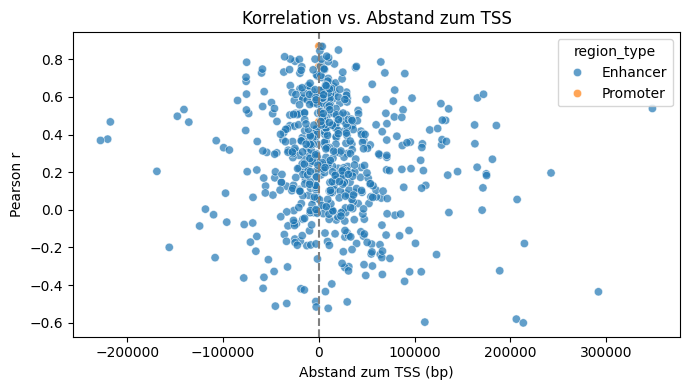

In [105]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=cor_df, x='distance_to_TSS', y='r', hue= 'region_type', alpha=0.7)
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Abstand zum TSS (bp)')
plt.ylabel('Pearson r')
plt.title('Korrelation vs. Abstand zum TSS')
plt.tight_layout()
plt.show()

In [108]:
#Index mit höchster |r| pro Gen finden
idx_max_corr = cor_df.groupby("gene")["r"].apply(lambda x: x.abs().idxmax())

# Entsprechende Zeilen extrahieren
most_associated_cre = cor_df.loc[idx_max_corr].reset_index(drop=True)

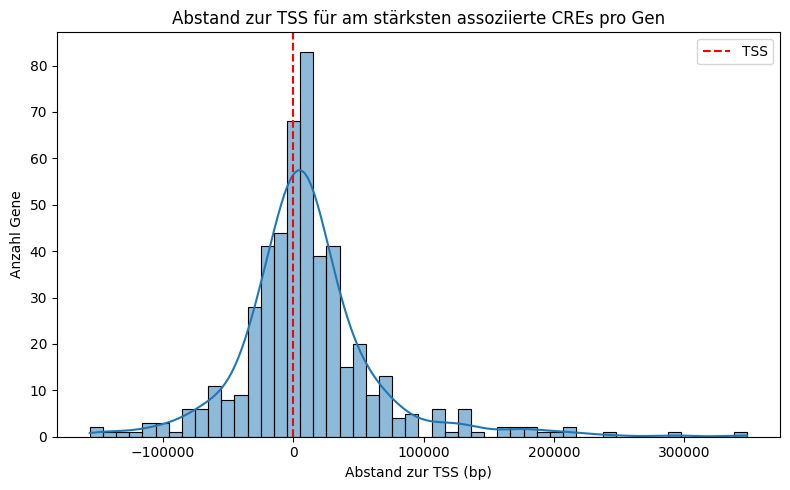

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(most_associated_cre["distance_to_TSS"], bins=50, kde=True)
plt.xlabel("Abstand zur TSS (bp)")
plt.ylabel("Anzahl Gene")
plt.title("Abstand zur TSS für am stärksten assoziierte CREs pro Gen")
plt.axvline(0, color='red', linestyle='--', label='TSS')
plt.legend()
plt.tight_layout()
plt.show()

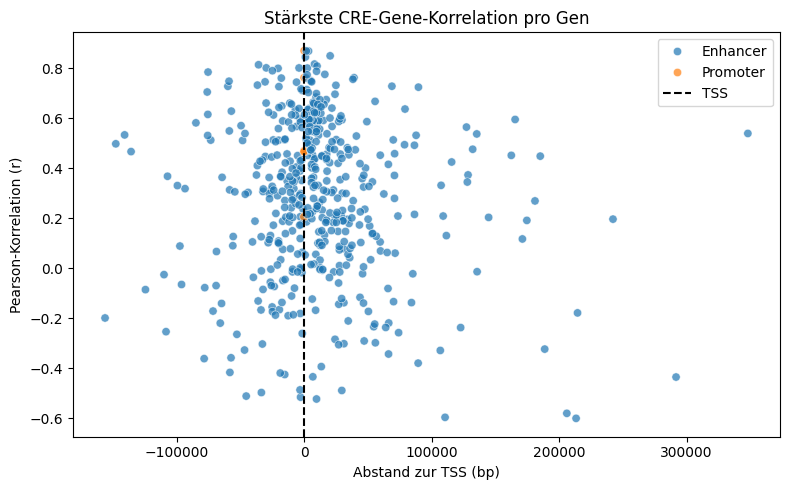

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=most_associated_cre,
                x="distance_to_TSS",
                y="r",
                hue="region_type",  # optional: nach Regionstyp einfärben, falls vorhanden
                alpha=0.7)

plt.axvline(0, color="black", linestyle="--", label="TSS")
plt.xlabel("Abstand zur TSS (bp)")
plt.ylabel("Pearson-Korrelation (r)")
plt.title("Stärkste CRE-Gene-Korrelation pro Gen")
plt.legend()
plt.tight_layout()
plt.show()

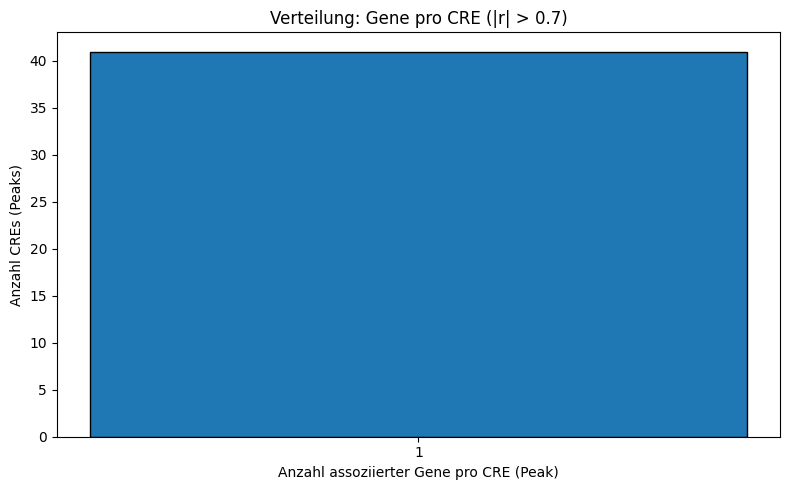

In [114]:
import matplotlib.pyplot as plt

# Schwellwert für relevante Assoziation
threshold = 0.7

# Nur stark korrelierende CRE-Gene-Paare behalten
assoziationen = cor_df[cor_df['r'].abs() > threshold]

# Zähle, wie viele Gene pro Peak (CRE) assoziiert sind
gene_pro_peak = assoziationen.groupby('peak_id').size()

# Plot
plt.figure(figsize=(8, 5))
plt.hist(gene_pro_peak, bins=range(1, gene_pro_peak.max() + 2), edgecolor='black', align='left')
plt.xlabel('Anzahl assoziierter Gene pro CRE (Peak)')
plt.ylabel('Anzahl CREs (Peaks)')
plt.title(f'Verteilung: Gene pro CRE (|r| > {threshold})')
plt.xticks(range(1, gene_pro_peak.max() + 1))
plt.tight_layout()
plt.show()

In [ ]:
# # ATAC w/ additional data

# from scipy.spatial import cKDTree
# exons['TSS'] = np.where(exons['Strand'] == '+',
#                         exons['Transcription Start'],
#                         exons['Transcription End'])
# distance_list = []
# gene_list = []

# for chrom in ATAC['chrom'].unique():
#     #print(f"Verarbeite Chromosom: {chrom}")

#     # Peaks auf diesem Chrom
#     peaks_chr = ATAC[ATAC['chrom'] == chrom]
#     peaks_pos = peaks_chr['Summit'].values

#     # TSS-Koordinaten und Gen-Namen auf diesem Chrom
#     exons_chr = exons[exons['Chromosom'] == chrom]
#     tss_pos = exons_chr['TSS'].values
#     gene_names = exons_chr['Genname'].values

#     if len(tss_pos) > 0:
#         # KDTree
#         tree = cKDTree(tss_pos.reshape(-1, 1))
#         dist, idx = tree.query(peaks_pos.reshape(-1, 1), k=1)
#         nearest_tss = tss_pos[idx]
#         signed_dist = peaks_pos - nearest_tss
#         distance_list.extend(signed_dist)
#         gene_list.extend(gene_names[idx])
#     else:
#         distance_list.extend([np.nan] * len(peaks_pos))
#         gene_list.extend([np.nan] * len(peaks_pos))

# # bins
# bins = [0, 300, 1000, 5000, 20000, 1e6]
# labels = ["0-300", "300-1k", "1k-5k", "5k-20k", ">20k"]

# # gene context: up/downstrem or intergenic
# def assign_peak_location(row, exons):
#     chrom = row['chrom']
#     peak_pos = row['Summit']
#     # Alle Gene auf diesem Chrom
#     exons_chr = exons[exons['Chromosom'] == chrom]
#     # Finde alle Gene, für die der Peak im Bereich liegt
#     hits = exons_chr[(exons_chr['Transcription Start'] <= peak_pos) & (exons_chr['Transcription End'] >= peak_pos)]
#     if not hits.empty:
#         return 'genic'
#     else:
#         # Bestimme nächstgelegenes Gen
#         if len(exons_chr) > 0:
#             # Hier nehmen wir den TSS des nächsten Gens
#             distances = abs(exons_chr['TSS'] - peak_pos)
#             idx = distances.idxmin()
#             tss = exons_chr.loc[idx, 'TSS']
#             # Liegt Peak vor oder nach TSS?
#             if peak_pos < tss:
#                 return 'upstream'
#             else:
#                 return 'downstream'
#         else:
#             return 'intergenic'

# ATAC_dis = ATAC.copy()
# ATAC_dis['nearest_gene'] = gene_list

## correlation

In [37]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Nur Gene verwenden, die in beiden vorkommen
gemeinsame_Gene = promoters_genes_df.index.intersection(rna_df.index)
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)

# Filter
promoters_genes = promoters_genes_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]
rna_df = rna_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]

# Ergebnislisten
korrelationswerte = []
p_values = []
gen_ids = []

# Iteriere über alle Zeilen im promoters_genes (auch doppelte Gen-Namen)
for idx, row in promoters_genes.iterrows():
    if idx in rna_df.index:
        x = row.values
        y = rna_df.loc[idx].values
        
        if not (np.isnan(x).any() or np.isnan(y).any()):
            r, p = pearsonr(x, y)
        else:
            r, p = np.nan, np.nan

        korrelationswerte.append(r)
        p_values.append(p)
        gen_ids.append(idx)

# Ergebnis-DataFrame
ergebnis = pd.DataFrame({
    'Gen': gen_ids,
    'Pearson_r': korrelationswerte,
    'p_value': p_values
})

print(ergebnis)


          Gen  Pearson_r   p_value
0      Mrpl15  -0.110638  0.313441
1      Mrpl15   0.001612  0.988319
2      Mrpl15   0.036041  0.743315
3      Mrpl15   0.148201  0.175864
4      Mrpl15  -0.005726  0.958524
...       ...        ...       ...
53033    Msl3   0.111133  0.311266
53034    Hccs   0.350650  0.001002
53035    Hccs   0.363234  0.000634
53036   Vamp7  -0.028662  0.794564
53037   Vamp7   0.266675  0.013622

[53038 rows x 3 columns]


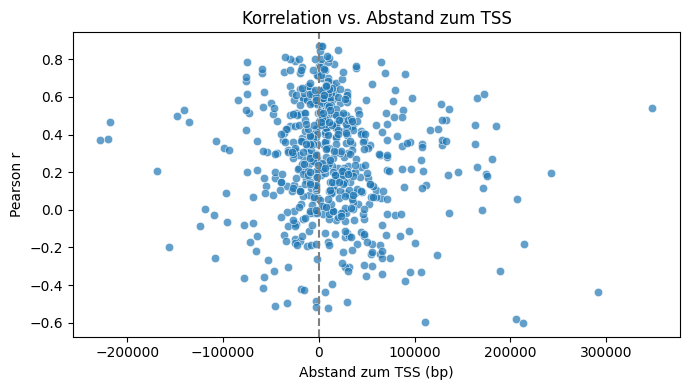

In [55]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=cor_df, x='distance_to_TSS', y='r', alpha=0.7)
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Abstand zum TSS (bp)')
plt.ylabel('Pearson r')
plt.title('Korrelation vs. Abstand zum TSS')
plt.tight_layout()
plt.show()

# weg damit

## weird plots

In [51]:
# Neues Feld mit Korrelation hinzufügen
ergebnis['distance_to_TSS'] = promoters_genes_df.loc[ergebnis['Gen'], 'distance_to_TSS'].values

# Höchst korrelierter CRE pro Gen
ergebnis_absmax = ergebnis.loc[ergebnis.groupby('Gen')['Pearson_r'].apply(lambda x: x.abs().idxmax())]

# Scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(ergebnis_absmax['distance_to_TSS'], ergebnis_absmax['Pearson_r'], alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Pearson correlation (r)')
plt.title('Most associated CRE per gene: r vs. distance to TSS')
plt.grid(True)
plt.show()


ValueError: Length of values (642756) does not match length of index (53038)

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Voraussetzungen:
# - atac_data: CRE (Peak) x Zelltypen
# - rna_df: Gene x Zelltypen
# - cre_gene_df: Spalten = ['CRE', 'Gene', 'Distance']

# Nur gemeinsame Zelltypen verwenden
gemeinsame_zelltypen = atac_data.columns.intersection(rna_df.columns)
atac_data = atac_data[gemeinsame_zelltypen]
rna_df = rna_df[gemeinsame_zelltypen]

results = []

for _, row in cre_gene_df.iterrows():
    cre = row['CRE']
    gene = row['Gene']
    dist = row['Distance']

    if cre in atac_data.index and gene in rna_df.index:
        x = atac_data.loc[cre].values
        y = rna_df.loc[gene].values

        if not (np.isnan(x).any() or np.isnan(y).any()):
            r, _ = pearsonr(x, y)
        else:
            r = np.nan

        results.append({'Gene': gene, 'CRE': cre, 'Distance': dist, 'Pearson_r': r})

korrelations_df = pd.DataFrame(results)
korrelations_df.dropna(inplace=True)

# ------------------------------------------------------
# ✅ Frage f: Streudiagramm Distanz vs. Pearson-R
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(korrelations_df['Distance'], korrelations_df['Pearson_r'], alpha=0.4, s=10)
plt.xlabel('Distanz CRE–TSS (bp)')
plt.ylabel('Pearson r')
plt.title('Korrelation vs. CRE–TSS-Distanz')
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# ✅ Für jedes Gen: bestkorrelierender CRE (für f)
# ------------------------------------------------------
beste_pro_gen = korrelations_df.loc[korrelations_df.groupby('Gene')['Pearson_r'].idxmax()]

# Optional: zeige die Top 5
print("\nTop korrelierte CREs pro Gen (Beispiel):")
print(beste_pro_gen.sort_values(by='Pearson_r', ascending=False).head(5))

# ------------------------------------------------------
# ✅ Frage g: Welche CREs korrelieren mit mehreren Genen?
# ------------------------------------------------------
threshold = 0.5  # z. B. Pearson r > 0.5 als stark
starke_korrelierte = korrelations_df[korrelations_df['Pearson_r'] > threshold]

anzahl_gene_pro_cre = starke_korrelierte['CRE'].value_counts()
mehrfach_gen_cres = anzahl_gene_pro_cre[anzahl_gene_pro_cre > 1]

print("\nCREs, die mit mehreren Genen stark korrelieren:")
print(mehrfach_gen_cres)

# Optional: Top CREs plotten
mehrfach_gen_cres.head(10).plot(kind='barh', figsize=(8, 5))
plt.xlabel('Anzahl korrelierter Gene (r > 0.5)')
plt.ylabel('CRE (Peak)')
plt.title('Top-CREs mit multipler Genkontrolle')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


NameError: name 'atac_data' is not defined

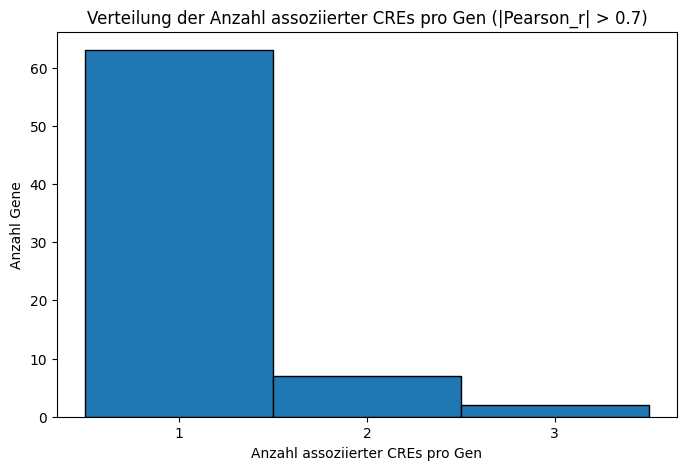

In [38]:
import matplotlib.pyplot as plt

# Schwellenwert für assoziierte CREs (kannst du anpassen)
threshold = 0.7

# Filter: nur CREs mit absoluter Korrelation größer als threshold
assoziierte_cres = ergebnis[ergebnis['Pearson_r'].abs() > threshold]

# Anzahl assoziierter CREs pro Gen zählen
anzahl_cres_pro_gen = assoziierte_cres.groupby('Gen').size()

# Histogramm plotten
plt.figure(figsize=(8,5))
plt.hist(anzahl_cres_pro_gen, bins=range(1, anzahl_cres_pro_gen.max()+2), edgecolor='black', align='left')
plt.xlabel('Anzahl assoziierter CREs pro Gen')
plt.ylabel('Anzahl Gene')
plt.title(f'Verteilung der Anzahl assoziierter CREs pro Gen (|Pearson_r| > {threshold})')
plt.xticks(range(1, anzahl_cres_pro_gen.max()+1))
plt.show()

In [115]:
# Schwellenwert für Korrelation (z. B. 0.7)
threshold = 0.7

# Anzahl eindeutiger CREs (Peaks), die mit mindestens einem Gen korrelieren
anzahl_peaks = cor_df[cor_df['r'].abs() > threshold]['peak_id'].nunique()

print(f"Anzahl assoziierter CREs (|r| > {threshold}): {anzahl_peaks}")

Anzahl assoziierter CREs (|r| > 0.7): 41


In [113]:
print(ergebnis.head())

Empty DataFrame
Columns: [Gen, Pearson_r, p_value]
Index: []


In [112]:
# Schwellenwert für signifikante Assoziation (anpassbar)
threshold = 0.7

# Nur stark korrelierende Paare auswählen
assoziationen = ergebnis[ergebnis['Pearson_r'].abs() > threshold]

# Zähle, wie oft jeder Peak (CRE) mit einem Gen assoziiert ist
# Falls du `peak_id` statt `Gen` verwendest:
anzahl_gene_pro_peak = assoziationen.groupby('peak_id').size()

# Histogramm plotten
plt.figure(figsize=(8,5))
plt.hist(anzahl_gene_pro_peak, bins=range(1, anzahl_gene_pro_peak.max()+2), edgecolor='black', align='left')
plt.xlabel('Anzahl assoziierter Gene pro CRE (Peak)')
plt.ylabel('Anzahl CREs')
plt.title(f'Verteilung der Anzahl assoziierter Gene pro CRE (|r| > {threshold})')
plt.xticks(range(1, anzahl_gene_pro_peak.max()+1))
plt.tight_layout()
plt.show()

KeyError: 'peak_id'

Anzahl assoziierter Promoter: 83
Anzahl nicht-assoziierter Promoter: 149375


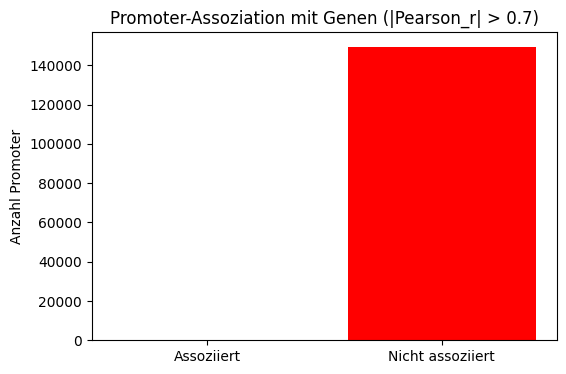

In [39]:
import matplotlib.pyplot as plt

# Schwellenwert für assoziierte Promoter (kannst du anpassen)
threshold = 0.7

# Alle Promoter-IDs (angenommen Index in promoters_genes_df ist eindeutig für Promoter)
alle_promoter = promoters_genes_df.index

# Promoter mit starker Korrelation (assoziierte)
assoziierte_promoter = ergebnis[ergebnis['Pearson_r'].abs() > threshold].index

# Anzahl assoziierte und nicht-assoziierte Promoter
anzahl_assoziierte = len(assoziierte_promoter)
anzahl_nicht_assoziierte = len(alle_promoter) - anzahl_assoziierte

print(f"Anzahl assoziierter Promoter: {anzahl_assoziierte}")
print(f"Anzahl nicht-assoziierter Promoter: {anzahl_nicht_assoziierte}")

# Balkendiagramm zeichnen
plt.figure(figsize=(6,4))
plt.bar(['Assoziiert', 'Nicht assoziiert'], [anzahl_assoziierte, anzahl_nicht_assoziierte], color=['green', 'red'])
plt.ylabel('Anzahl Promoter')
plt.title(f'Promoter-Assoziation mit Genen (|Pearson_r| > {threshold})')
plt.show()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Angenommen, du hast zusätzlich eine Spalte 'Promoter' mit Promoter-IDs in ergebnis
# Falls nicht, musst du die Promoter-IDs beim Berechnen der Korrelation mit abspeichern!

# Beispiel: Promoter mit mehreren Genassoziationen (abs Korrelation > 0.7)
assoziations_threshold = 0.7

# Filter für starke Assoziationen
assoziiert = ergebnis[ergebnis['Pearson_r'].abs() > assoziations_threshold]

# Anzahl Gene pro Promoter
gene_pro_promoter = assoziiert.groupby('Promoter')['Gen'].nunique()

# Promoter mit mehreren Genen
promoter_mehrere_gene = gene_pro_promoter[gene_pro_promoter > 1].index

# Filtere DataFrame auf diese Promoter
assoziiert_multi = assoziiert[assoziiert['Promoter'].isin(promoter_mehrere_gene)]

# Pivot-Tabelle für Heatmap: Zeilen=Promoter, Spalten=Gene, Werte=Pearson_r
heatmap_data = assoziiert_multi.pivot(index='Promoter', columns='Gen', values='Pearson_r')

# Heatmap zeichnen
plt.figure(figsize=(12, max(6, len(heatmap_data)*0.5)))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Pearson r'})
plt.title('Promoter mit mehreren Genassoziationen (Pearson r > 0.7)')
plt.xlabel('Gene')
plt.ylabel('Promoter')
plt.tight_layout()
plt.show()

KeyError: 'Promoter'

Text(0.5, 1.0, 'Verteilung der Peak-Gene-Korrelationen')

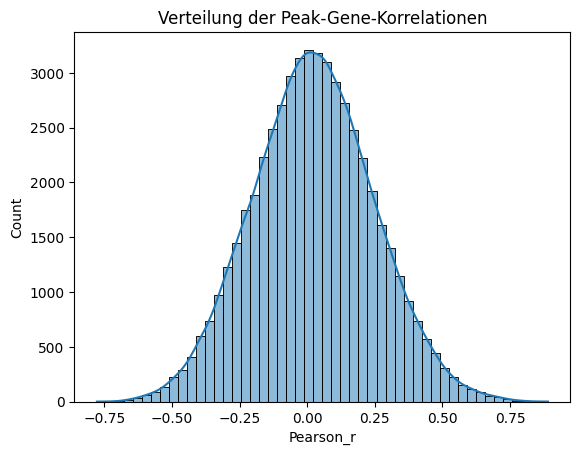

In [20]:
sns.histplot(ergebnis["Pearson_r"], bins=50, kde=True)
plt.title("Verteilung der Peak-Gene-Korrelationen")

In [ ]:
sns.scatterplot(data=ergebnis, x="distance_to_TSS", y="Pearson_r", alpha=0.5)
plt.title("Korrelation vs. Distanz zum TSS")

In [24]:
threshold = 0.5
sig_cor = ergebnis[ergebnis["Pearson_r"].abs() > threshold]
print(f"{len(sig_cor)} von {len(ergebnis)} Peaks sind signifikant korreliert")

1343 von 53038 Peaks sind signifikant korreliert


In [35]:
# 1. Pro Gen den Index der Zeile mit dem höchsten Betrag der Korrelation finden
idx_top_corr = ergebnis.groupby("Gen")["Pearson_r"].apply(lambda x: x.abs().idxmax())

# 2. Diese Zeilen aus ergebnis extrahieren
top_per_gene = ergebnis.loc[idx_top_corr].reset_index(drop=True)

# 3. Optional: sortieren nach Pearson_r (absolut oder direkt)
top_per_gene = top_per_gene.sort_values("Pearson_r", ascending=False)

print(top_per_gene.head())

          Gen  Pearson_r       p_value
4489   Rnf216   0.889868  5.031434e-30
5903  Unc93b1   0.875790  5.518476e-28
2740    Lime1   0.869547  3.703474e-27
4898  Slc25a4   0.845034  2.793879e-24
5199     Stk3   0.822546  4.772915e-22


## not working

In [37]:
import matplotlib.pyplot as plt

gemeinsame_zelltypen = promoters_genes.columns.intersection(rna_df.columns)

for _, row in top_per_gene.iterrows():
    peak_idx = row['peak_index']
    gen = row['Gen']

    # Promoter-Signal für diesen Peak (über Zelltypen)
    x = promoters_genes.loc[peak_idx, gemeinsame_zelltypen].values
    # Gen-Expression
    y = rna_df.loc[gen, gemeinsame_zelltypen].values

    plt.figure(figsize=(6,4))
    plt.scatter(x, y)
    plt.xlabel("ATAC-seq Signal (Peak)")
    plt.ylabel("RNA Expression (Gen)")
    plt.title(f"Gen: {gen} - Top korrelierter Peak")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

KeyError: 'peak_index'

In [36]:
#Indizes der Peaks mit höchster Korrelation pro Gen (entsprechen Zeilen in promoters_genes_df)
top_peak_indices = top_per_gene.index

# Filter auf gemeinsame Zelltypen
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)

# Signalmatrix der Top-Peaks (Peaks × Zelltypen)
top_peak_signals = promoters_genes_df.loc[top_peak_indices, gemeinsame_zelltypen]

KeyError: "None of [Index([4489, 5903, 2740, 4898, 5199, 2363, 2405, 3407, 3280, 2216,\n       ...\n       1400, 4076, 2468,  207, 2581, 5706, 4756, 4433, 1651, 1082],\n      dtype='object', name='gene', length=6431)] are in the [index]"

## weird plots

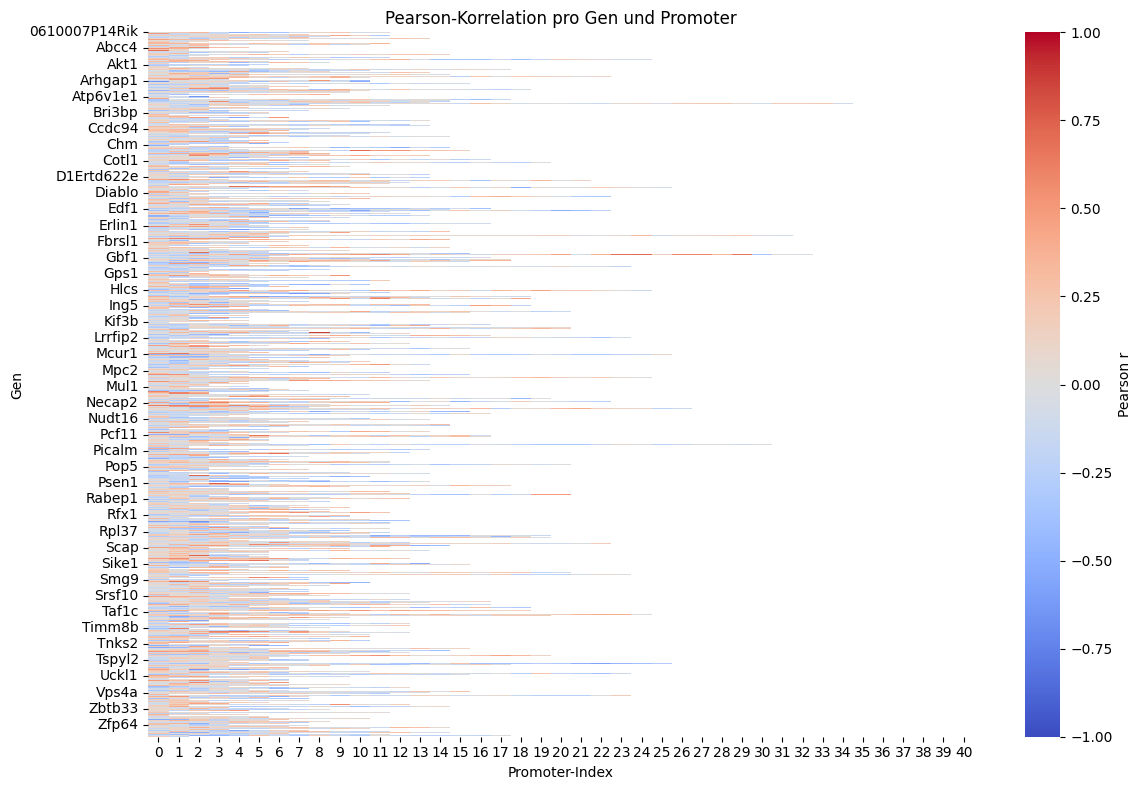

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot-Tabelle: Zeilen = Gene, Spalten = Promoter-Vorkommen (automatisch nummeriert)
heatmap_data = ergebnis.copy()
heatmap_data['Promoter_ID'] = heatmap_data.groupby('Gen').cumcount()

# Pivot in Matrixform (z. B. für Heatmap)
heatmap_matrix = heatmap_data.pivot(index='Gen', columns='Promoter_ID', values='Pearson_r')

# Zeichnen
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False, cbar_kws={'label': 'Pearson r'})
plt.title('Pearson-Korrelation pro Gen und Promoter')
plt.xlabel('Promoter-Index')
plt.ylabel('Gen')
plt.tight_layout()
plt.show()

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sicherstellen, dass Gene und Zelltypen übereinstimmen
gemeinsame_gene = promoters_genes_df.index.intersection(rna_df.index)
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)

# Filter anwenden
promoters_genes = promoters_genes_df.loc[gemeinsame_gene, gemeinsame_zelltypen]
rna = rna_df.loc[gemeinsame_gene, gemeinsame_zelltypen]

# Korrelation pro Gen (über alle Zelltypen)
correlations = []
for gene in gemeinsame_gene:
    x = promoters_genes.loc[gene].values
    y = rna.loc[gene].values
    if not (np.isnan(x).any() or np.isnan(y).any()):
        r, _ = pearsonr(x, y)
    else:
        r = np.nan
    correlations.append(r)

# Heatmap vorbereiten (Gene x Pearson r)
cor_df = pd.DataFrame({'Pearson_r': correlations}, index=gemeinsame_gene)

# Zeichnen
plt.figure(figsize=(1.5, len(cor_df)/80))  # Höhe anpassen bei vielen Genen
sns.heatmap(cor_df, cmap='coolwarm', center=0, linewidths=0.2, cbar_kws={'label': 'Pearson r'})
plt.title("Genweise Pearson-Korrelation\n(Promoter vs RNA über Zelltypen)")
plt.ylabel("Gene")
plt.xlabel("")
plt.tight_layout()
plt.show()

ValueError: `x` and `y` must have the same length along `axis`.

In [ ]:
top_per_gene = cor_df.loc[cor_df.groupby("Gene")["Pearson_r"].apply(lambda x: x.abs().idxmax())]
# pro gen der peak mit der höchsten korrelation

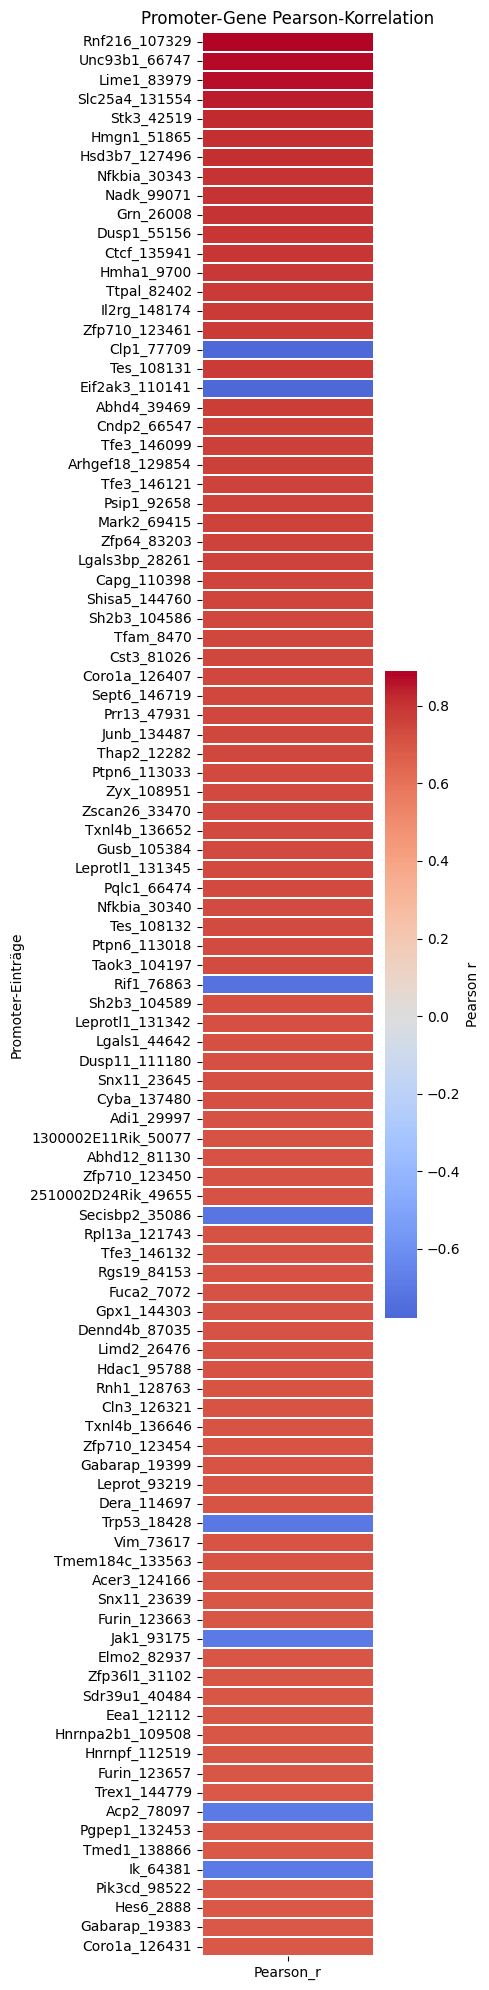

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

korrelationswerte = []
promoter_labels = []

# nur gemeinsame Zelltypen
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)
promoters_filtered = promoters_genes_df[gemeinsame_zelltypen]
rna_filtered = rna_df[gemeinsame_zelltypen]

for i, (promoter_index, promoter_row) in enumerate(promoters_filtered.iterrows()):
    gene_name = promoter_index  # falls Index der Gene ist
    if gene_name not in rna_filtered.index:
        korrelationswerte.append(np.nan)
        promoter_labels.append(f"{gene_name}_{i}")
        continue

    x = promoter_row.values
    y = rna_filtered.loc[gene_name].values

    if len(x) != len(y):
        korrelationswerte.append(np.nan)
    elif np.isnan(x).any() or np.isnan(y).any():
        korrelationswerte.append(np.nan)
    else:
        r, _ = pearsonr(x, y)
        korrelationswerte.append(r)

    promoter_labels.append(f"{gene_name}_{i}")

# DataFrame mit den Korrelationen
cor_df = pd.DataFrame({'Pearson_r': korrelationswerte}, index=promoter_labels)

top_n = 100
top_kor_df = cor_df.reindex(cor_df["Pearson_r"].abs().sort_values(ascending=False).index).head(top_n)

# Heatmap zeichnen
plt.figure(figsize=(5, 20))
sns.heatmap(top_kor_df, cmap='coolwarm', center=0, linewidths=0.2, cbar_kws={'label': 'Pearson r'})
plt.title("Promoter-Gene Pearson-Korrelation")
plt.ylabel("Promoter-Einträge")
plt.xlabel("")
plt.tight_layout()
plt.show()

## not working

In [34]:
# nur der am stärksten korrelierte peak pro gen
# 1. Gen-Namen aus dem Index extrahieren und als neue Spalte hinzufügen
cor_df["Gene"] = cor_df.index.str.extract(r"^(.*?)_")  # alles vor dem ersten "_"

# 2. Pro Gen den Index (also den besten Promoter für das Gen) mit höchster |Pearson_r| finden
top_per_gene_idx = cor_df.groupby("Gene")["Pearson_r"].apply(lambda x: x.abs().idxmax())

# 3. Diese Zeilen aus cor_df herausziehen
top_per_gene_df = cor_df.loc[top_per_gene_idx]

# Optional: nach Pearson_r sortieren
top_per_gene_df = top_per_gene_df.sort_values("Pearson_r", ascending=False)

# Ergebnis anzeigen
print(top_per_gene_df.head())

KeyError: 'Column not found: Pearson_r'

In [27]:
from collections import defaultdict
from scipy.stats import pearsonr
import numpy as np
import pandas as pd

cor_matrix = defaultdict(dict)

for i, (promoter_index, promoter_row) in enumerate(promoters_filtered.iterrows()):
    gene_name = promoter_index
    peak_label = f"{gene_name}_{i}"

    if gene_name not in rna_filtered.index:
        continue

    x = promoter_row.values
    y = rna_filtered.loc[gene_name].values

    if len(x) != len(y) or np.isnan(x).any() or np.isnan(y).any():
        continue

    r, _ = pearsonr(x, y)
    cor_matrix[gene_name][peak_label] = r

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Top 50 nach Betrag der Pearson-Korrelation
top_50 = cor_df["Pearson_r"].abs().sort_values(ascending=False).head(50)
top_50_df = cor_df.loc[top_50.index]

# 2. Heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(top_50_df, cmap="coolwarm", center=0, linewidths=0.3, cbar_kws={'label': 'Pearson r'})

plt.title("Top 50 korrelierte Promoter-Gene")
plt.ylabel("Promoter-Peak (Index)")
plt.xlabel("")
plt.tight_layout()
plt.show()


KeyError: 'Pearson_r'

In [28]:
cor_df = pd.DataFrame.from_dict(cor_matrix, orient='index')

In [29]:
top_peaks_per_gene = cor_df.apply(lambda row: row[row.abs().idxmax()], axis=1)
top_peak_labels = cor_df.apply(lambda row: row.abs().idxmax(), axis=1)


In [30]:
heatmap_df = pd.DataFrame({
    'Best_Peak': top_peak_labels,
    'Pearson_r': top_peaks_per_gene
})


In [31]:
# Breite Matrix für Heatmap: One-hot mit r-Werten
heatmap_matrix = pd.DataFrame(index=heatmap_df.index, columns=heatmap_df['Best_Peak'].unique())

for gene, row in heatmap_df.iterrows():
    peak = row['Best_Peak']
    r = row['Pearson_r']
    heatmap_matrix.loc[gene, peak] = r

heatmap_matrix = heatmap_matrix.astype(float)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, len(heatmap_matrix) / 4))
sns.heatmap(heatmap_matrix, cmap="coolwarm", center=0, linewidths=0.1, cbar_kws={'label': 'Pearson r'})
plt.title("Gene vs. höchst korrelierter Peak")
plt.xlabel("Peak")
plt.ylabel("Gen")
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 1.23 GiB for an array with shape (6431, 6431, 4) and data type float64

<Figure size 1200x160775 with 2 Axes>

In [121]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

korrelationswerte = []
p_values = []

for gene in promoters_genes.index:
    x = promoters_genes.loc[gene].values
    y = rna_df.loc[gene].values
    
    if not (np.isnan(x).any() or np.isnan(y).any()):
        r, p = pearsonr(x, y)
    else:
        r, p = np.nan, np.nan
    
    korrelationswerte.append(r)
    p_values.append(p)

ergebnis = pd.DataFrame({
    'Pearson_r': korrelationswerte,
    'p_value': p_values
}, index=promoters_genes.index)

print(ergebnis)

ValueError: `x` and `y` must have the same length along `axis`.

In [120]:
korrelationswerte = []
p_values = []

for gene in gemeinsame_Gene:
    x = promoters_genes.loc[gene].values
    y = rna_df.loc[gene].values
    
    # Prüfen, ob keine NaNs drin sind (ansonsten pearsonr scheitert)
    if not (np.isnan(x).any() or np.isnan(y).any()):
        r, p = pearsonr(x, y)
    else:
        r, p = np.nan, np.nan
    
    korrelationswerte.append(r)
    p_values.append(p)

# Ergebnis als DataFrame
import pandas as pd
ergebnis = pd.DataFrame({'Pearson_r': korrelationswerte, 'p_value': p_values}, index=gemeinsame_Gene)

print(ergebnis)

ValueError: `x` and `y` must have the same length along `axis`.

In [48]:
from scipy.stats import pearsonr
import pandas as pd

results = []

# Hole alle ATAC-Peak-Spalten (außer der Gene-Spalte)
peak_columns = [col for col in promoters.columns if col != 'genes.within.100Kb']

# Iteriere über alle ATAC-Peaks
for peak in peak_columns:
    # Hole ATAC-Werte für alle Zellen
    atac_values = promoters[peak]

    # Hole die Gene, die mit dem Peak assoziiert sind
    gene_list = promoters['genes.within.100Kb'].dropna().apply(lambda x: x.split(','))

    # Wir gehen Zelle für Zelle durch
    for gene_set in gene_list.unique():
        for gene in gene_set:
            gene = gene.strip()
            if gene not in rna_df.columns:
                continue

            # Hole RNA-Werte für dieses Gen
            rna_values = rna_df[gene]

            # Gemeinsame Zellen für beide Werte
            common_cells = atac_values.index.intersection(rna_values.index)

            # Hole ATAC & RNA Werte
            atac_vals = atac_values.loc[common_cells]
            rna_vals = rna_values.loc[common_cells]

            # Prüfe auf gültige Länge
            if len(atac_vals.dropna()) >= 3 and len(rna_vals.dropna()) >= 3:
                r, p = pearsonr(atac_vals, rna_vals)
                results.append({
                    'peak': peak,
                    'gene': gene,
                    'correlation': r,
                    'p_value': p,
                    'n_cells': len(common_cells)
                })

# Ergebnis als DataFrame
cor_df = pd.DataFrame(results)
cor_df = cor_df.sort_values(by='correlation', ascending=False)

# Beispiel-Ausgabe
print(cor_df.head())

KeyError: 'genes.within.100Kb'

In [43]:
from scipy.stats import pearsonr
results=[]
gene=row['genes.within.100Kb']

genes_in_promoters = set(promoters['genes.within.100Kb'])

# Gene aus rna_df (Index)
genes_in_rna = set(rna_df.index)

# Gemeinsame Gene (Schnittmenge)
common_genes = genes_in_promoters.intersection(genes_in_rna)


print(f"Anzahl Gene in beiden Datensätzen: {len(common_genes)}")
print("Beispiele gemeinsamer Gene:", list(common_genes)[:10])


for peak_id, row in promoters.iterrows():
    #peak_id=row['ImmGenATAC1219.peakID']
    gene=row['genes.within.100Kb']
    if peak_id in promoters.index and gene in rna_df.index:
        atac_values = promoters.loc[peak_id]
        rna_values= rna_df.loc[gene]

        r, p=pearsonr(atac_values, rna_values)

        results.append({
            'peak_id': peak_id,
            'gene_name': gene,
            'correlation': r,
            'p_value': p
        })

Anzahl Gene in beiden Datensätzen: 435
Beispiele gemeinsamer Gene: ['Hspa13', 'D1Ertd622e', 'Nipbl', 'Med30', 'Ufm1', 'Pkn2', 'Rgs3', 'Ccnl1', 'Raly', 'Impad1']


ValueError: `x` and `y` must have the same length along `axis`.

In [40]:
corr_df=pd.DataFrame(results)
print(corr_df.head())

Empty DataFrame
Columns: []
Index: []


In [5]:
print("ATAC_scores columns:")
print(list(ATAC_scores.columns))
print("RNA columns:")
print(list(RNA.columns))

gemeinsame_spalten = set(ATAC_scores.columns) & set(RNA.columns)
print("Gemeinsame Spalten:", gemeinsame_spalten)
print("ATAC ohne RNA:", set(ATAC_scores.columns) - set(RNA.columns))
print("RNA ohne ATAC:", set(RNA.columns) - set(ATAC_scores.columns))

ATAC_scores columns:
['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'I

In [41]:
results = []

# 1. Extrahiere alle Gene aus promoters (kann mehrere pro Peak sein, z.B. 'GeneA;GeneB')
genes_in_promoters_raw = promoters['genes.within.100Kb'].dropna().tolist()

genes_in_promoters = set()
for gstr in genes_in_promoters_raw:
    genes_in_promoters.update(gstr.split(';'))

genes_in_rna = set(rna_df.index)
common_genes = genes_in_promoters.intersection(genes_in_rna)

print(f"Anzahl Gene in beiden Datensätzen: {len(common_genes)}")
print("Beispiele gemeinsamer Gene:", list(common_genes)[:10])

# 2. Für jeden Promoter-Peak Korrelation berechnen
for peak_id, row in promoters.iterrows():
    gene_str = row['genes.within.100Kb']
    if pd.isna(gene_str):
        continue
    
    genes_list = gene_str.split(';')
    
    # Suche erstes Gen aus der Schnittmenge common_genes
    gene = None
    for g in genes_list:
        if g in common_genes:
            gene = g
            break
    if gene is None:
        continue
    
    # Promoter ATAC-Signalwerte (alles außer Annotationen)
    # Angenommen, deine Annotationsspalten sind z.B. 'genes.within.100Kb' und andere,
    # und die restlichen Spalten sind Proben mit Signalwerten.
    # Deshalb hier alle Spalten außer Annotationen filtern:
    atac_signal = row.drop(labels=['genes.within.100Kb', 'andere_annot_spalten...'], errors='ignore')
    
    rna_values = rna_df.loc[gene]
    
    if atac_signal.isnull().any() or rna_values.isnull().any():
        continue
    
    r, p = pearsonr(atac_signal, rna_values)
    
    results.append({
        'peak_id': peak_id,
        'gene_name': gene,
        'correlation': r,
        'p_value': p
    })

corr_df = pd.DataFrame(results)
print(f"Korrelationen berechnet für {len(corr_df)} Promoter-Gene Paare")

Anzahl Gene in beiden Datensätzen: 435
Beispiele gemeinsamer Gene: ['Hspa13', 'D1Ertd622e', 'Nipbl', 'Med30', 'Ufm1', 'Pkn2', 'Rgs3', 'Ccnl1', 'Raly', 'Impad1']


NameError: name 'pearsonr' is not defined

In [6]:
def correlate_promoter_atac_rna(ATAC, RNA, ATAC_scores):
    # Nur gemeinsame Cell-Typ-Namen verwenden!
    gemeinsame_celltypen = [col for col in ATAC_scores.columns if col in RNA.columns]
    print(f"Gemeinsame Celltypen ({len(gemeinsame_celltypen)}):", gemeinsame_celltypen)
    
    promoter_peaks = ATAC[ATAC['distance_to_TSS'] <= 2000].copy()
    promoter_peaks['main_gene'] = promoter_peaks['nearest_gene']
    results = []
    for idx, row in promoter_peaks.iterrows():
        gene = row['main_gene']
        if gene in RNA.index:
            atac_vec = row[gemeinsame_celltypen].values.astype(float)
            rna_vec = RNA.loc[gene, gemeinsame_celltypen].values.astype(float)
            if not (np.isnan(atac_vec).any() or np.isnan(rna_vec).any()):
                r, p = scipy.stats.pearsonr(atac_vec, rna_vec)
                results.append({'peak_id': idx, 'gene': gene, 'r': r, 'p': p})
    print(f"Anzahl berechnete Korrelationen: {len(results)}")
    return pd.DataFrame(results)

In [8]:
print(ATAC['distance_to_TSS'])

KeyError: 'distance_to_TSS'

In [7]:
cor_df = correlate_promoter_atac_rna(ATAC_dis[ATAC_dis.index.isin(ATAC_top)], RNA, ATAC_scores)
print(cor_df.columns)
print(cor_df['peak_id'])

Gemeinsame Celltypen (85): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI

In [10]:
gene_df=exons.copy()
gene_df['TSS'] = np.where(gene_df['Strand'] == '+', gene_df['Transcription Start'], gene_df['Transcription End'])

In [3]:
import pandas as pd

# Beispiel: du hast exons.csv und atac.csv eingelesen
# exons = pd.read_csv("exons.csv")
# ATAC = pd.read_csv("atac.csv")

results = []

for i, peak in ATAC.iterrows():
    peak_chr = peak['chrom']
    peak_summit = peak['Summit']
    
    # Falls mehrere Gene in einem Feld mit Komma getrennt sind
    genes = str(peak['genes.within.100Kb']).split(',')
    
    for gene in genes:
        gene = gene.strip()
        gene_row = exons[(exons['Genname'] == gene) & (exons['Chromosom'] == peak_chr)]
        
        if gene_row.empty:
            continue
        
        strand = gene_row.iloc[0]['Strand']
        
        # TSS je nach Strang
        if strand == '+':
            tss = gene_row.iloc[0]['Transcription Start']
            distance = peak_summit - tss
        else:
            tss = gene_row.iloc[0]['Transcription End']
            distance = tss - peak_summit
        
        results.append({
            'peak_id': peak['ImmGenATAC1219.peakID'],
            'chrom': peak_chr,
            'gene': gene,
            'strand': strand,
            'summit': peak_summit,
            'tss': tss,
            'distance_to_TSS': distance,
            'abs_distance': abs(distance)
        })

# Umwandeln in DataFrame
dist_df = pd.DataFrame(results)

# Beispiel: nächstgelegene CRE pro Gen
closest_CRE_per_gene = dist_df.sort_values(by='abs_distance').groupby('gene').first().reset_index()

# Anzeigen
print(closest_CRE_per_gene.head())

KeyError: 'ImmGenATAC1219.peakID'

In [8]:
atac_df=ATAC.copy()
results=[]
for i, peak in atac_df.iterrows():
    chrom = peak['chrom']
    summit = peak['Summit']
    genes = str(peak['genes.within.100Kb']).split(',')
    for gene in genes:
        gene = gene.strip()

        match = exons[(exons['Genname'] == gene) & (exons['Chromosom'] == chrom)]
            
        if match.empty:
            continue

        row = match.iloc[0]
        strand = row['Strand']
        tss = row['Transcription Start'] if strand == '+' else row['Transcription End']
        distance = summit - tss if strand == '+' else tss - summit
        results.append({
            'peak_id': peak['peak_id'],
            'gene': gene,
            'chrom': chrom,
            'strand': strand,
            'summit': summit,
            'tss': tss,
            'distance_to_TSS': distance,
            'abs_distance': abs(distance)

        })
distance_df = pd.DataFrame(results)

KeyError: 'peak_id'